In [1]:
import os
import math
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
DATA_PATH = os.path.join(os.getcwd(), "..", "data")
VER_PATH = os.path.join(os.getcwd(), "..", "viz")
ACTIONS = ["shield", "soccer"]
N_ACTIONS = len(ACTIONS)
IMU_COLS = ["accX", "accY", "accZ", "gyrX", "gyrY", "gyrZ"]
PARTS = ["ankle", "gun"]

In [5]:
for action in ACTIONS:
    for part in PARTS: 
        folder_path = os.path.join(DATA_PATH, action, part)
        files = os.listdir(folder_path)
        print(f"Action {action} Part {part} has {len(files)} files")

Action shield Part ankle has 10 files
Action shield Part gun has 10 files
Action soccer Part ankle has 10 files
Action soccer Part gun has 10 files


In [6]:
def plot_same_column_in_grid(action, part, folder_path, imu_col):
    files = os.listdir(folder_path)
    n_files = len(files)
    
    n_rows = math.ceil(n_files / 2)
    n_cols = 2

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 3 * n_rows)) 

    for idx, file in enumerate(files):
        file_path = os.path.join(folder_path, file)
        
        df = pd.read_csv(file_path)
        df["time"] = df.index

        row, col = divmod(idx, 2)
    
        ax = axs[row, col] if n_rows > 1 else axs[col]
        ax.plot(df["time"], df[imu_col])
        ax.set_title(f'{file}')
        ax.set_xlabel('Time')
        ax.set_ylabel(f'{imu_col} Value')

    for empty_idx in range(n_files, n_rows * n_cols):
        fig.delaxes(axs.flatten()[empty_idx])

    plt.suptitle(f'{imu_col} Over Time for Action: {action}, Part: {part}')
    plt.tight_layout(rect=[0, 0, 1, 0.95])  
    plt.savefig(os.path.join(VER_PATH, 'images', f'{action}_{part}_{imu_col}.png'))
    plt.show()

In [7]:
def plot_resultant_acc_in_grid(action, part, folder_path):
    files = os.listdir(folder_path)
    n_files = len(files)
    
    n_rows = math.ceil(n_files / 2)
    n_cols = 2

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 3 * n_rows)) 

    for idx, file in enumerate(files):
        file_path = os.path.join(folder_path, file)
        
        df = pd.read_csv(file_path)
        df["time"] = df.index
        df["accRes"] = (df["accX"]**2 + df["accY"]**2 + df["accZ"]**2)**0.5

        row, col = divmod(idx, 2)
    
        ax = axs[row, col] if n_rows > 1 else axs[col]
        ax.plot(df["time"], df["accRes"])
        ax.set_title(f'{file}')
        ax.set_xlabel('Time')
        ax.set_ylabel(f'accRes Value')

    for empty_idx in range(n_files, n_rows * n_cols):
        fig.delaxes(axs.flatten()[empty_idx])

    plt.suptitle(f'accRes Over Time for Action: {action}, Part: {part}')
    plt.tight_layout(rect=[0, 0, 1, 0.95]) 
    plt.savefig(os.path.join(VER_PATH, 'images', f'{action}_{part}_accRes.png'))
    plt.show()

Action shield Part ankle Column accX


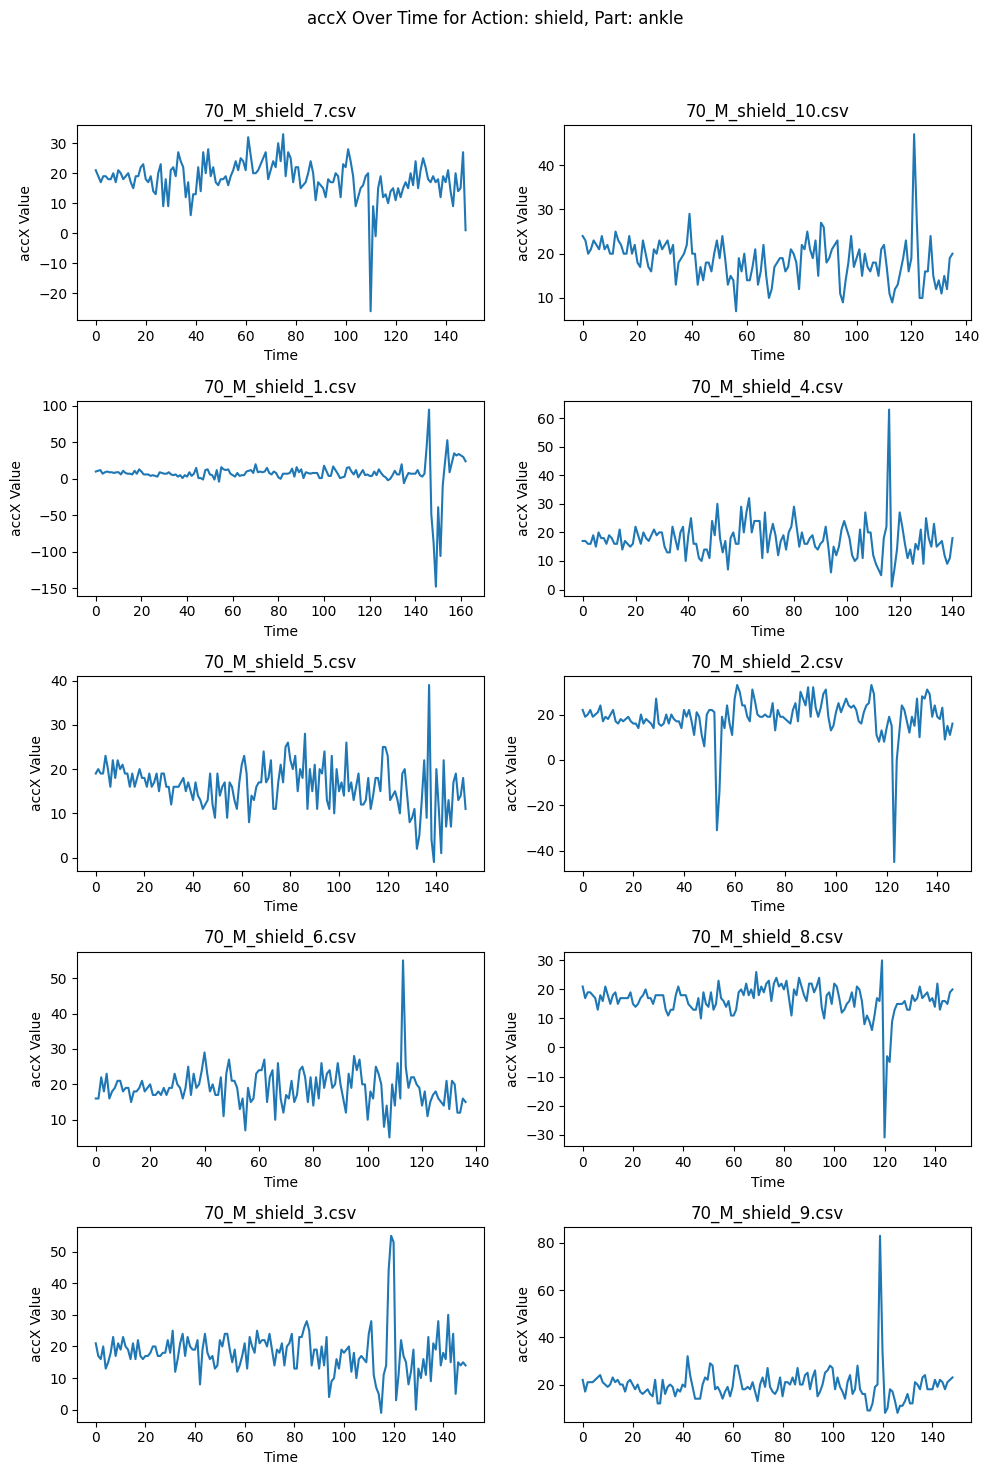

Action shield Part ankle Column accY


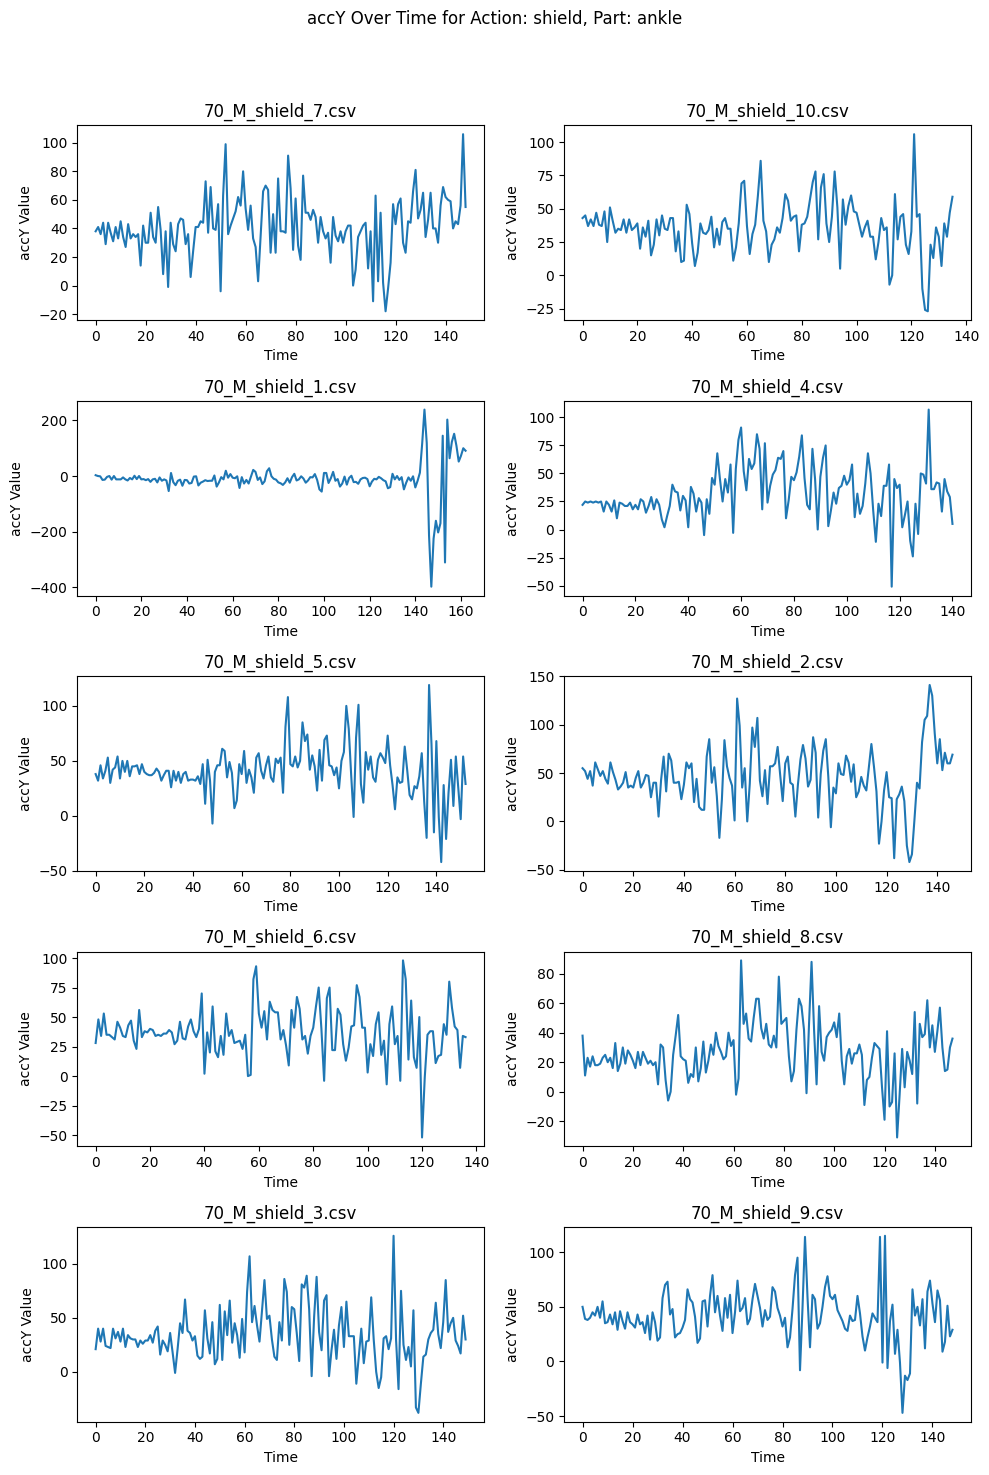

Action shield Part ankle Column accZ


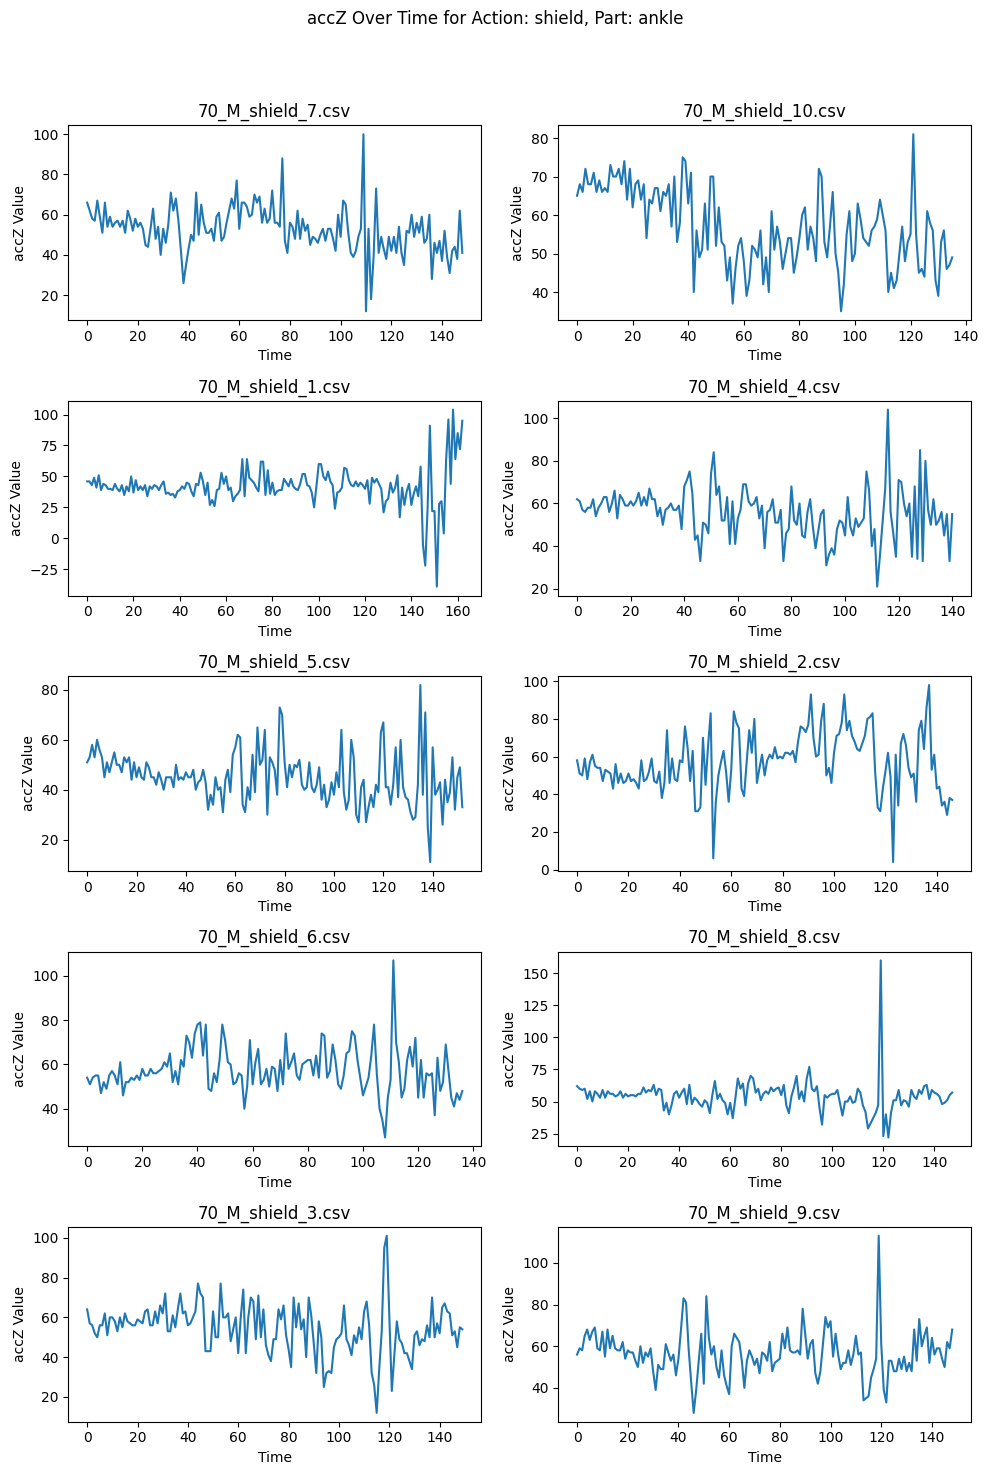

Action shield Part ankle Column gyrX


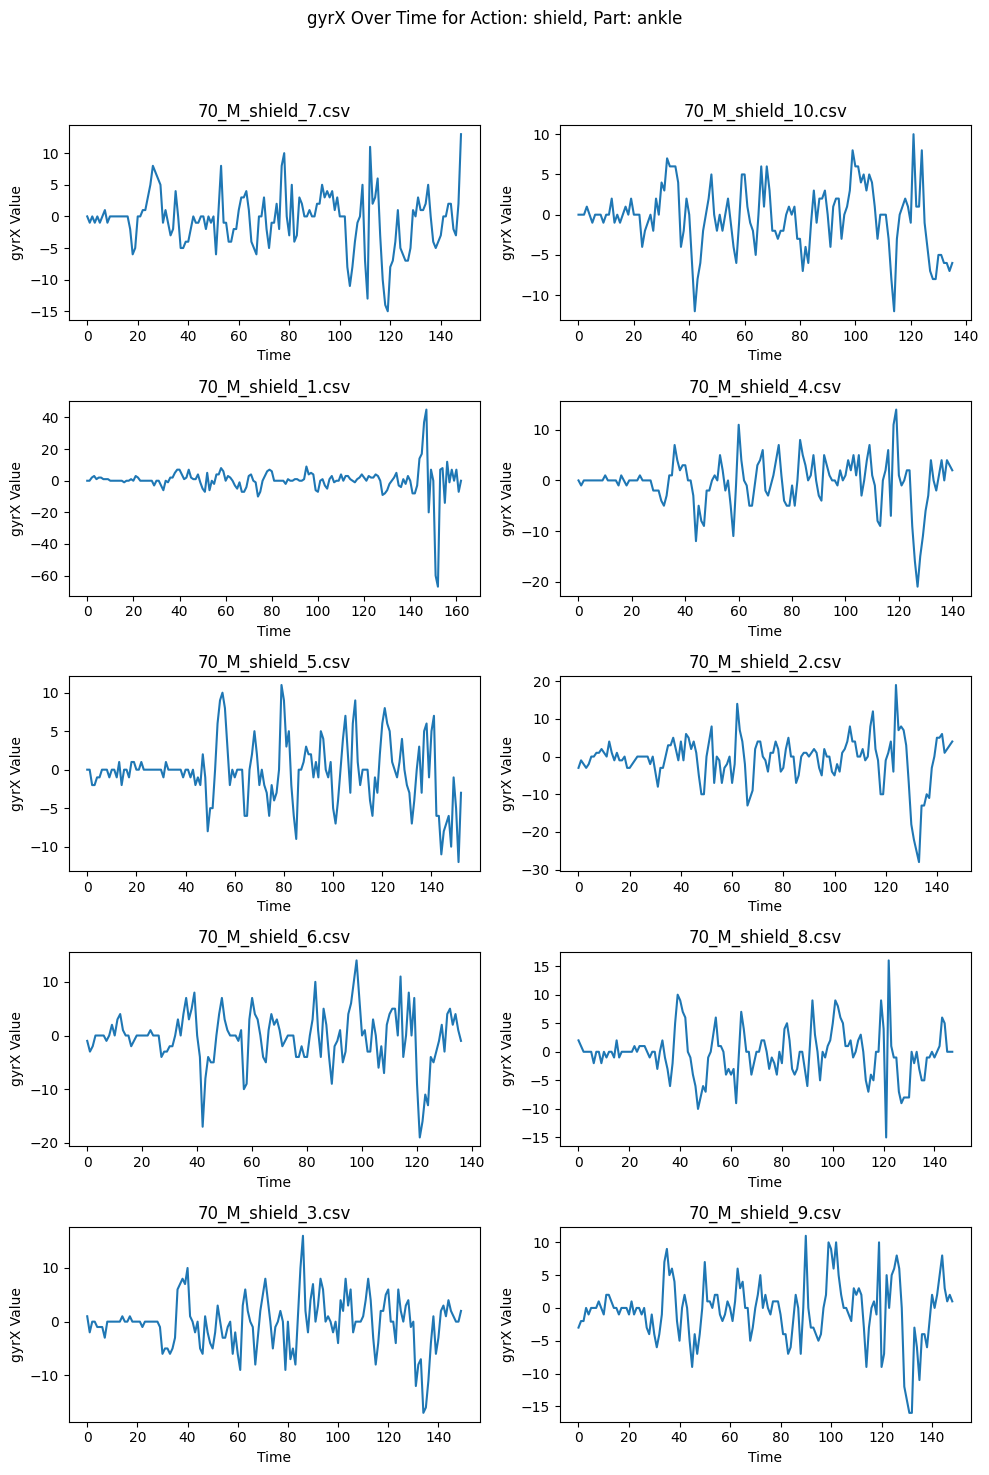

Action shield Part ankle Column gyrY


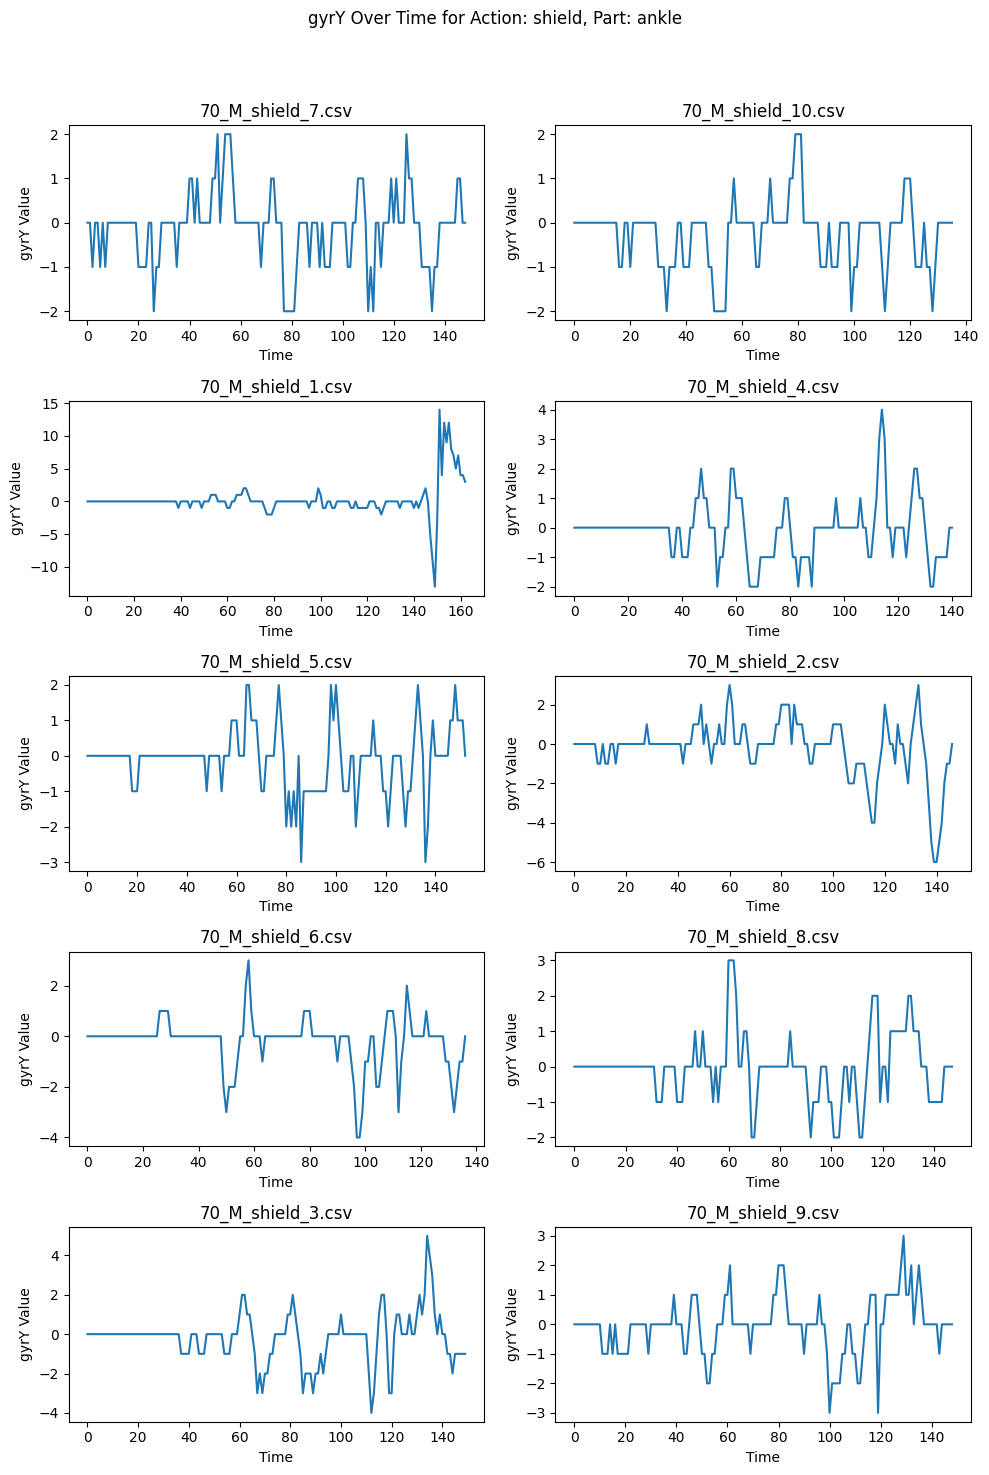

Action shield Part ankle Column gyrZ


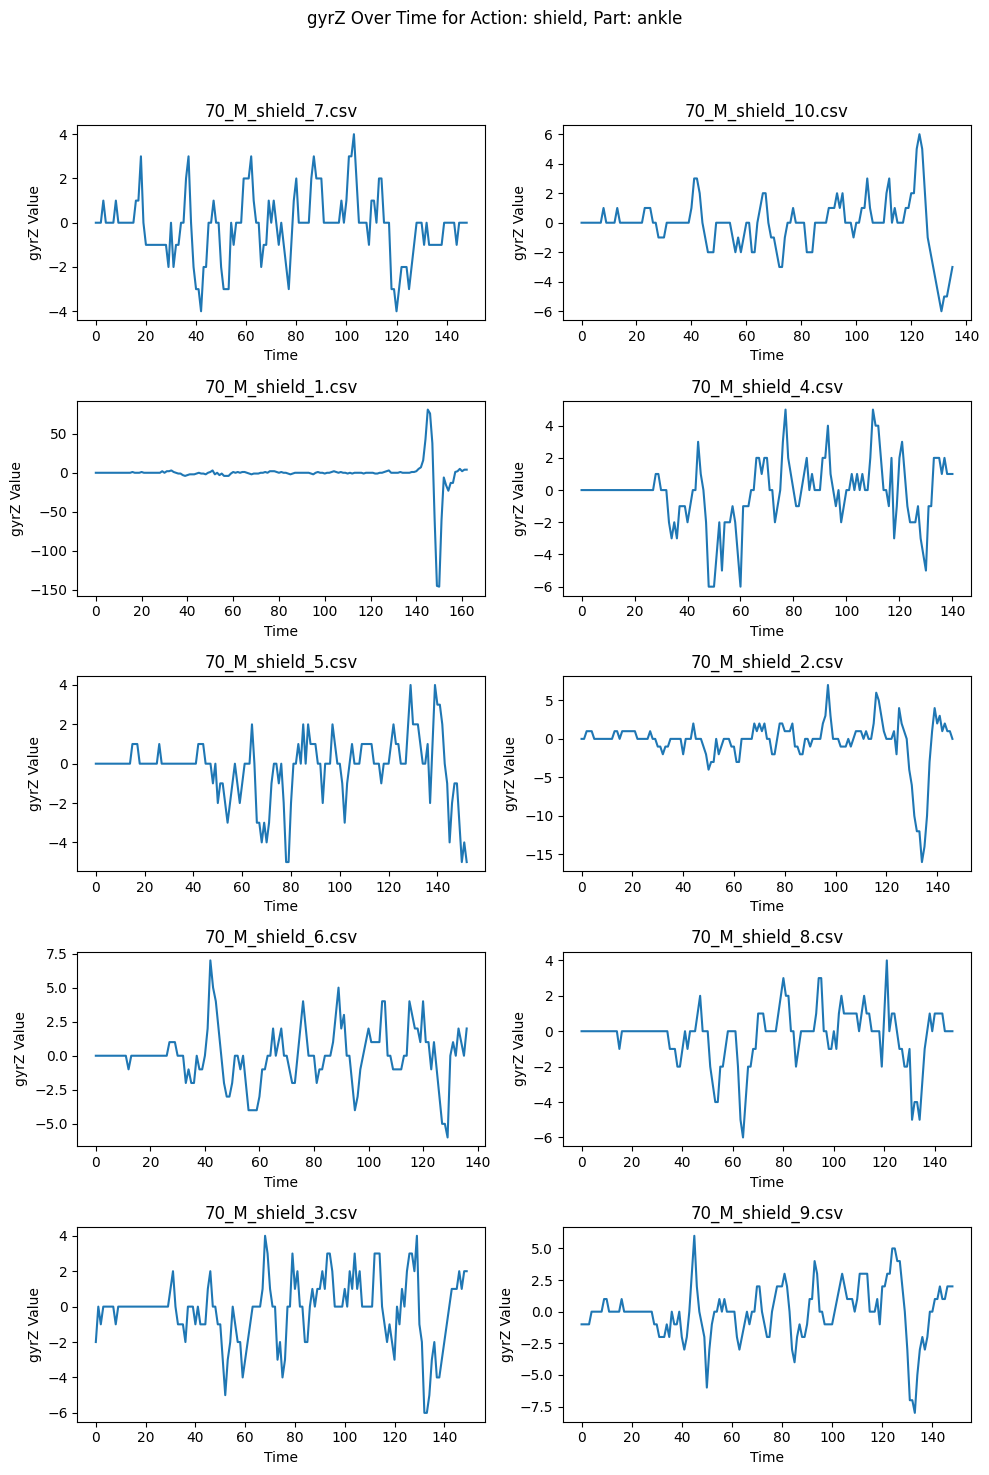

Action shield Part gun Column accX


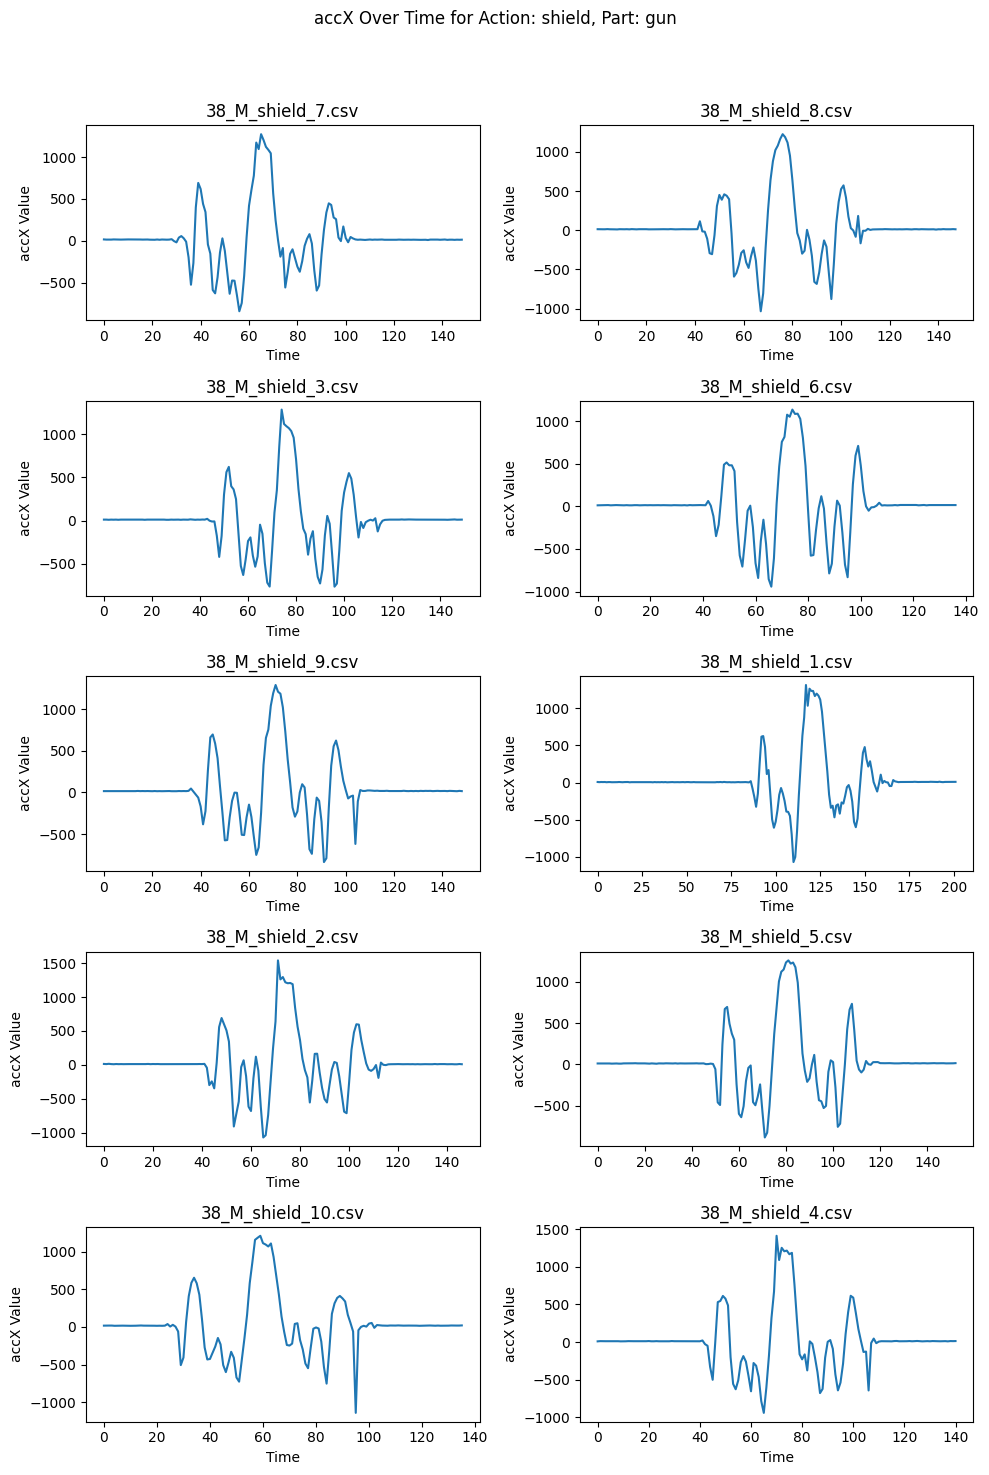

Action shield Part gun Column accY


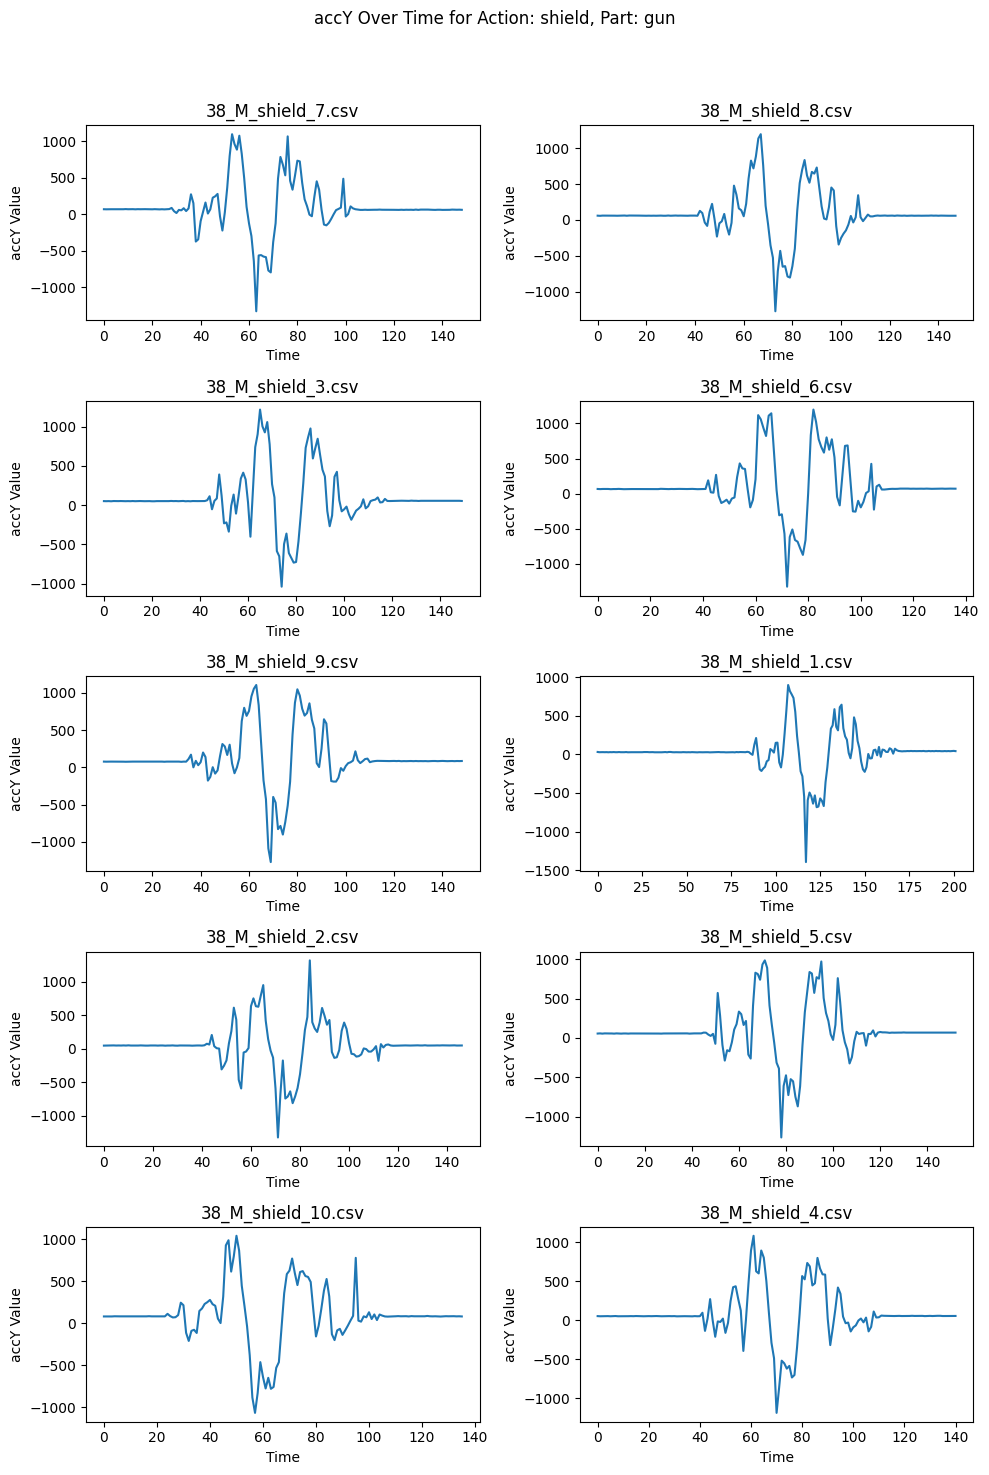

Action shield Part gun Column accZ


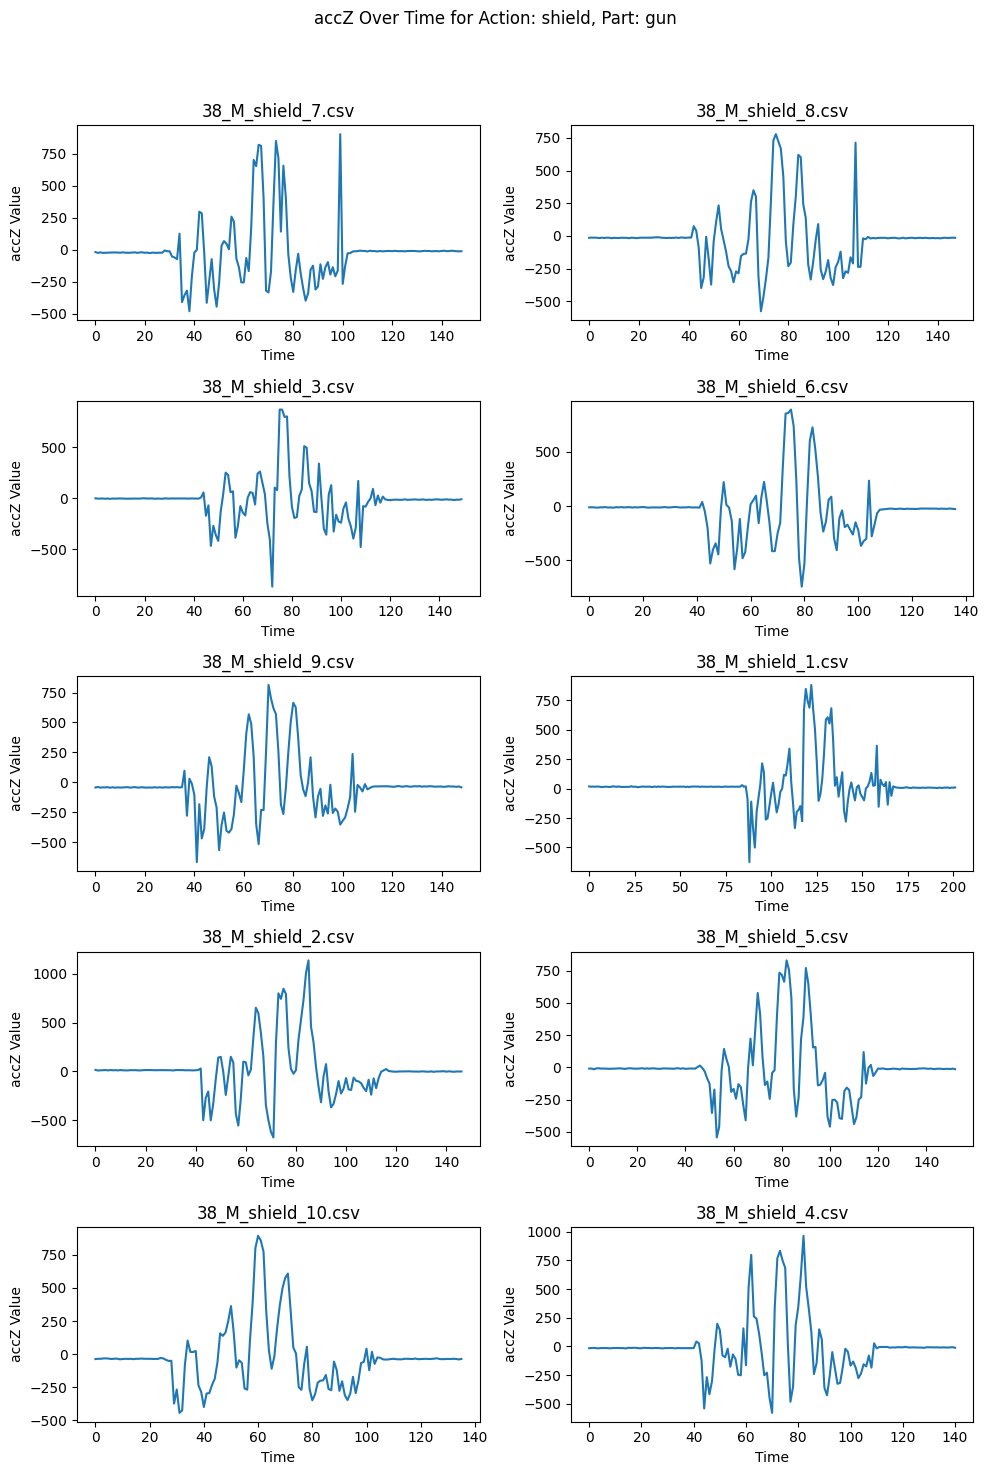

Action shield Part gun Column gyrX


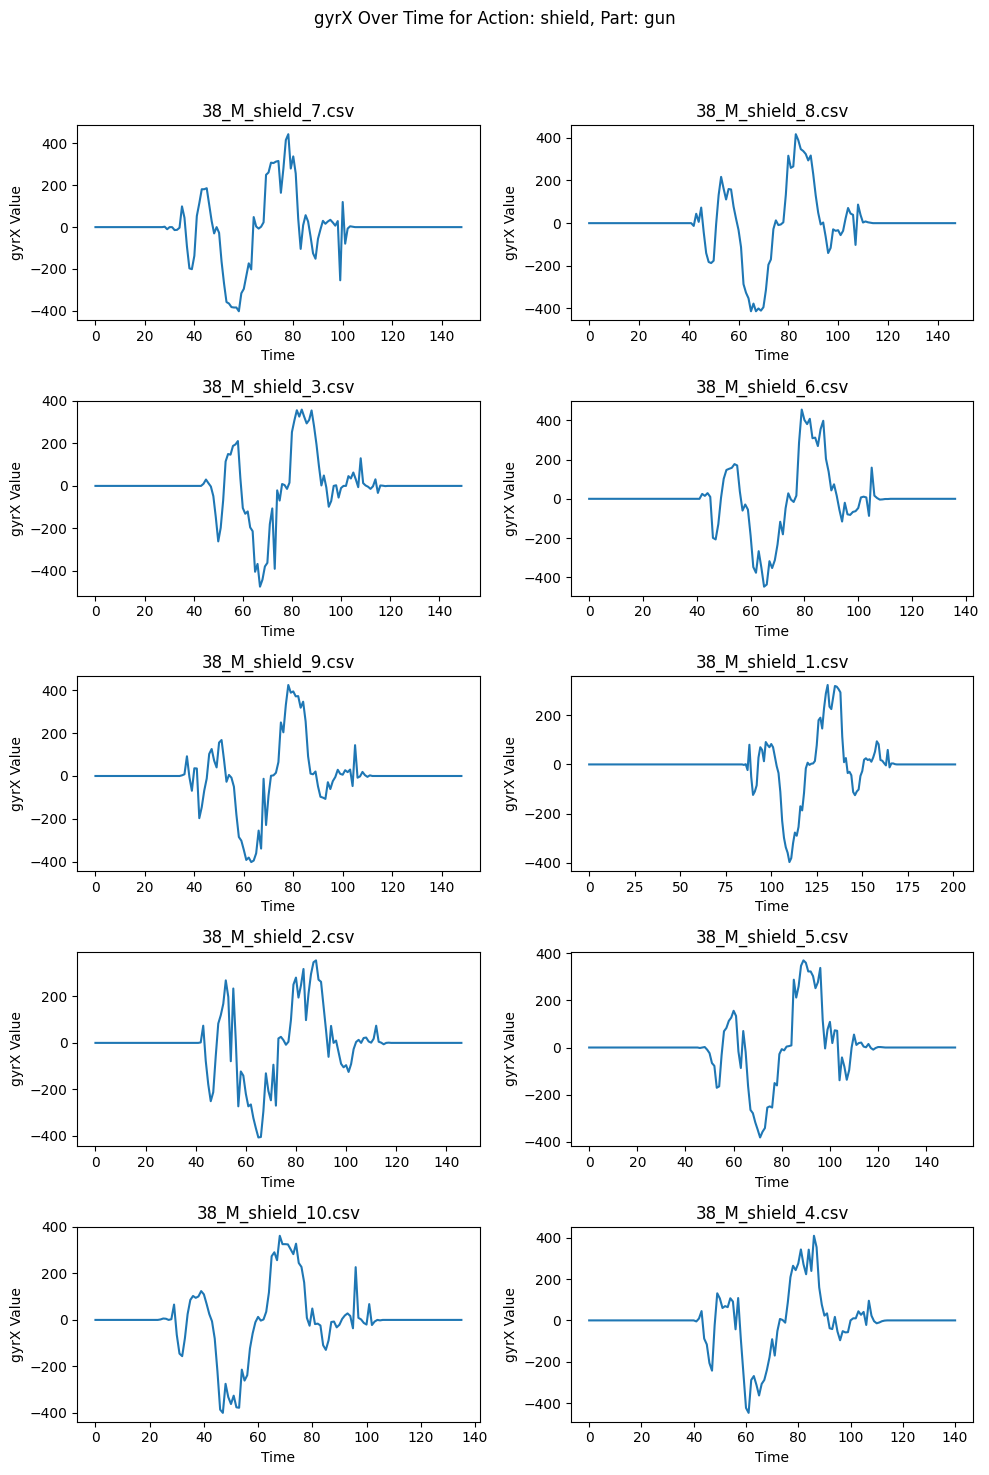

Action shield Part gun Column gyrY


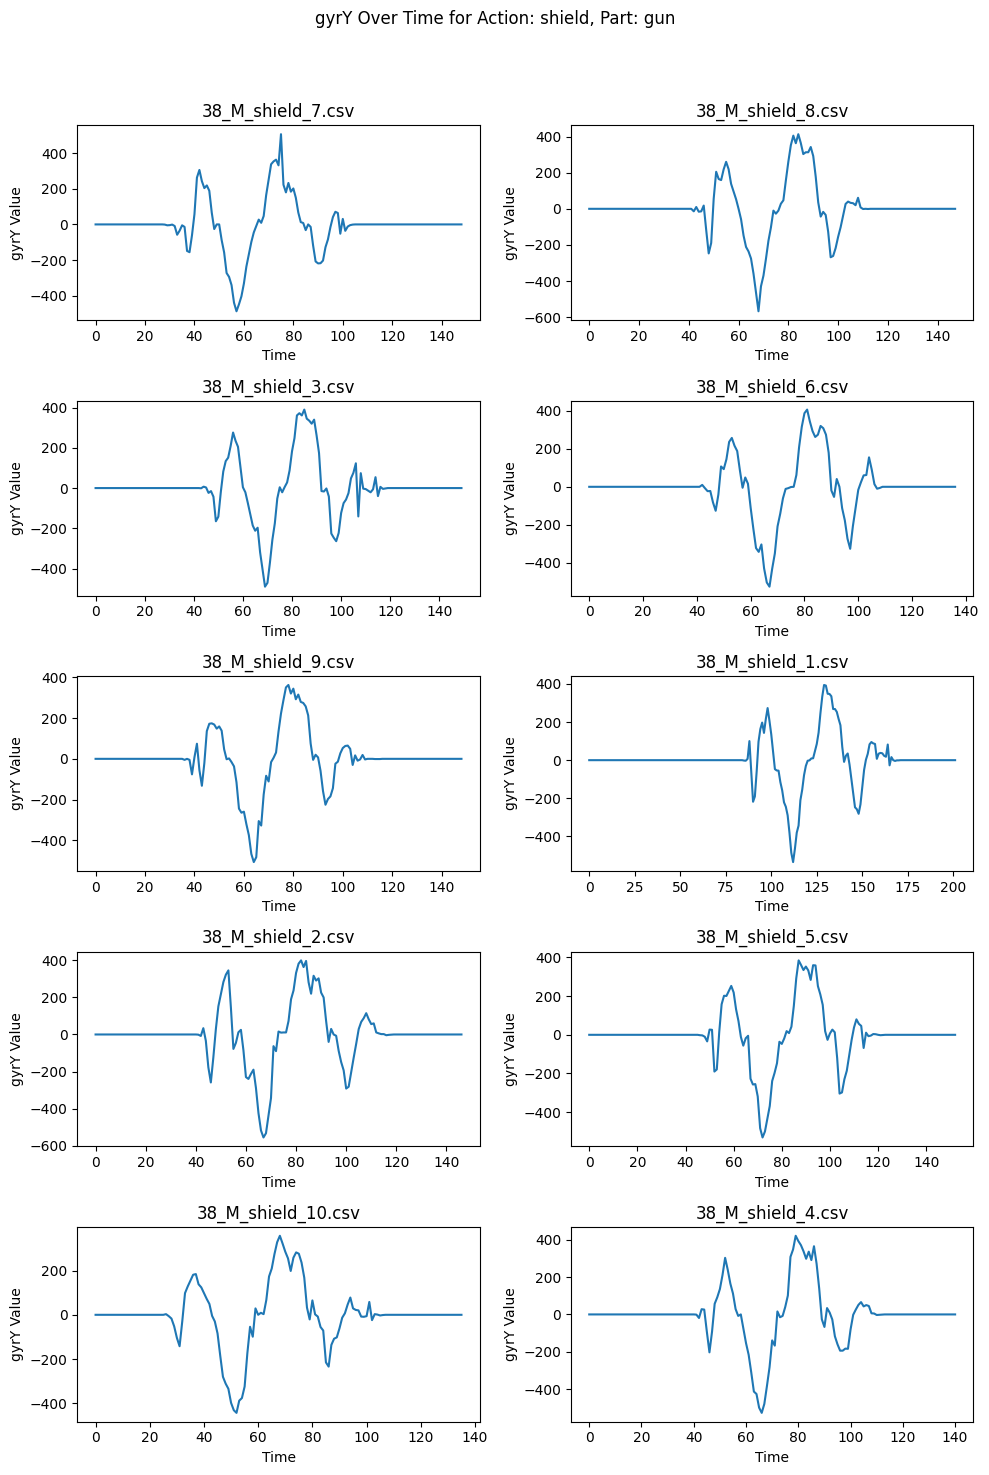

Action shield Part gun Column gyrZ


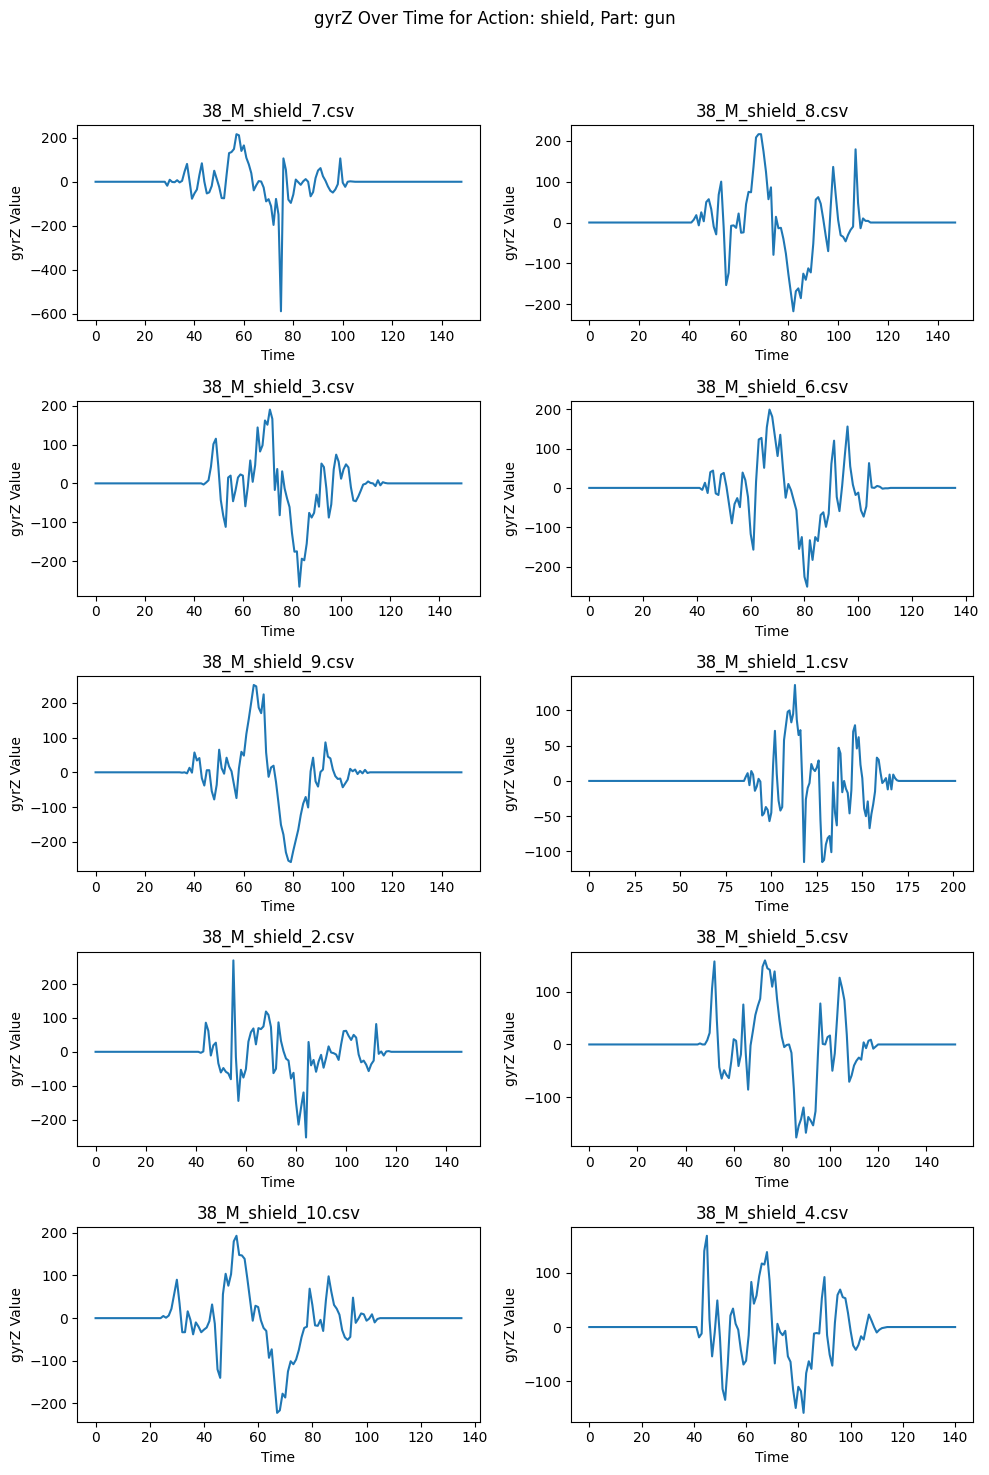

Action soccer Part ankle Column accX


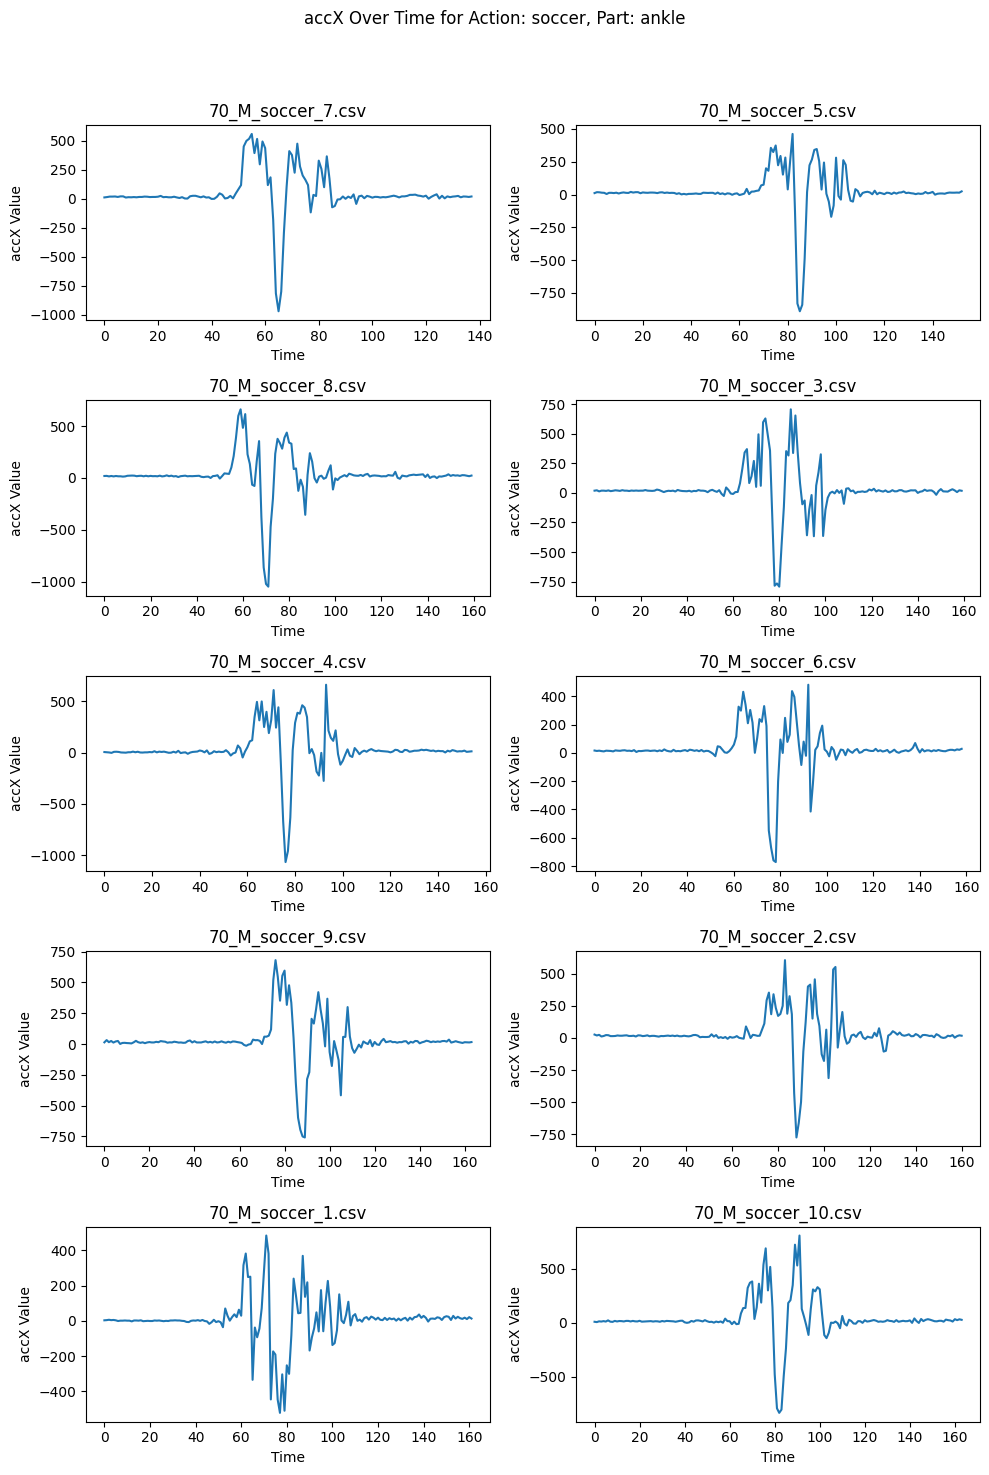

Action soccer Part ankle Column accY


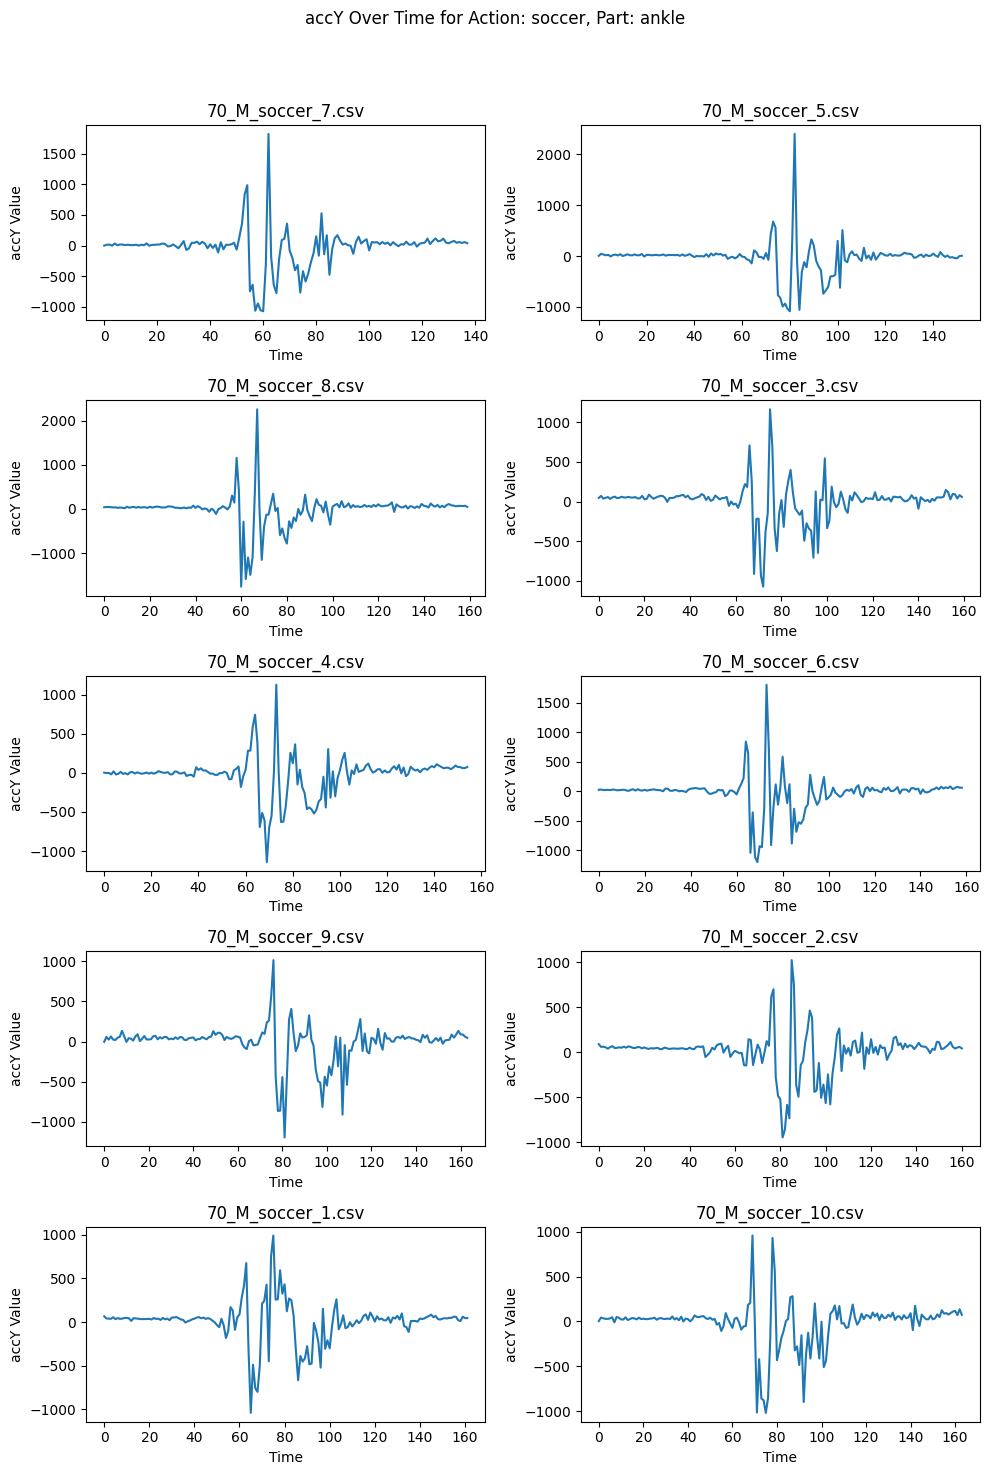

Action soccer Part ankle Column accZ


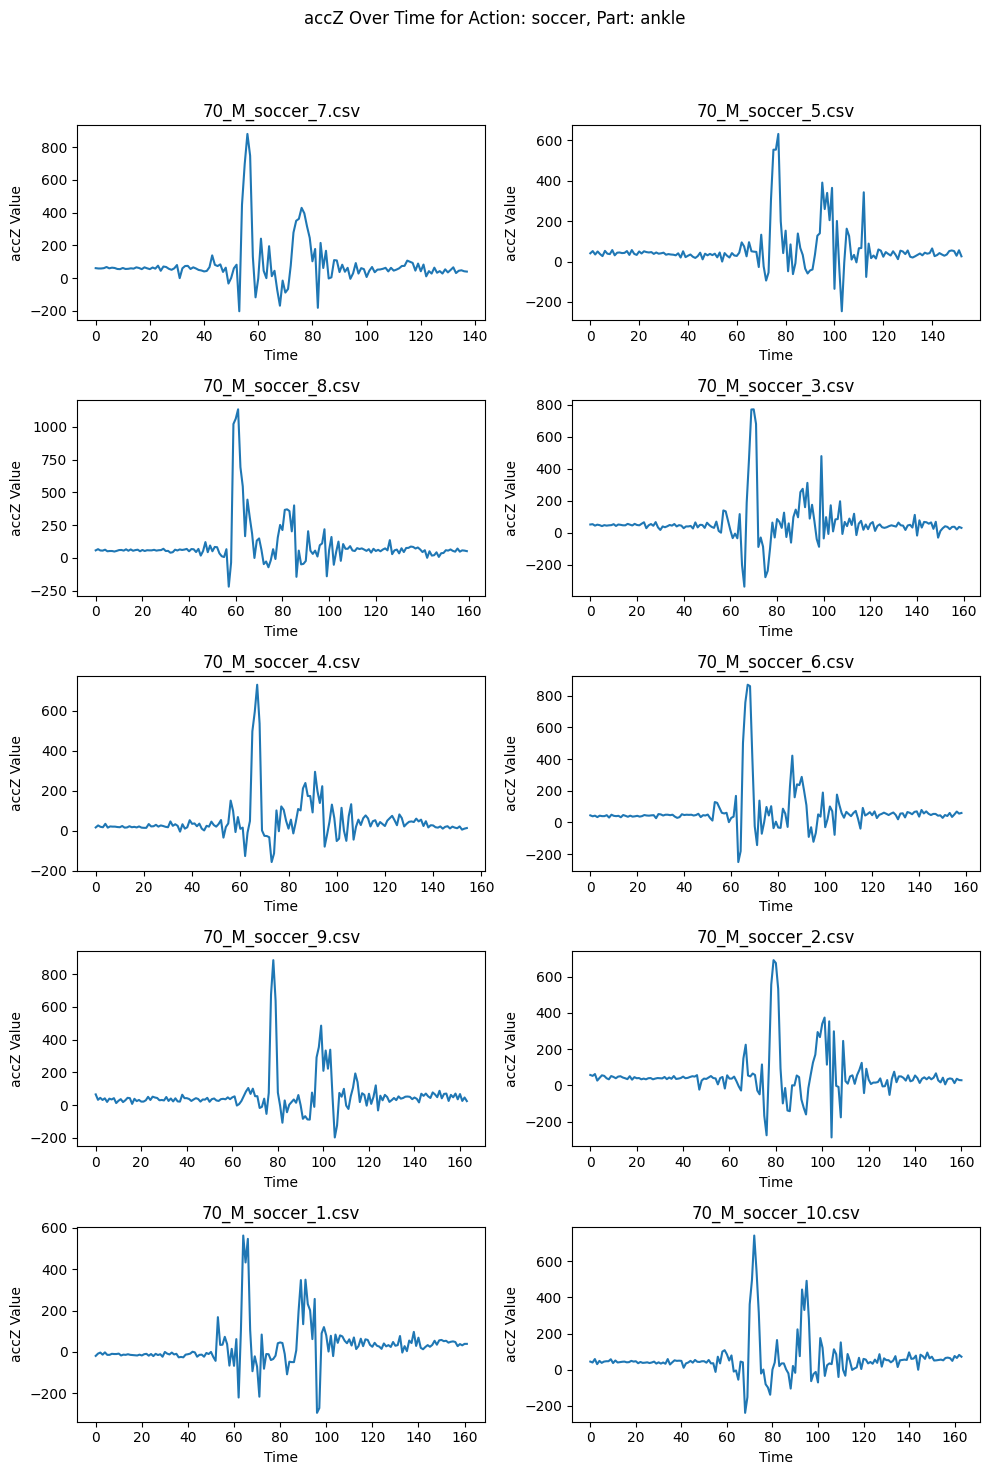

Action soccer Part ankle Column gyrX


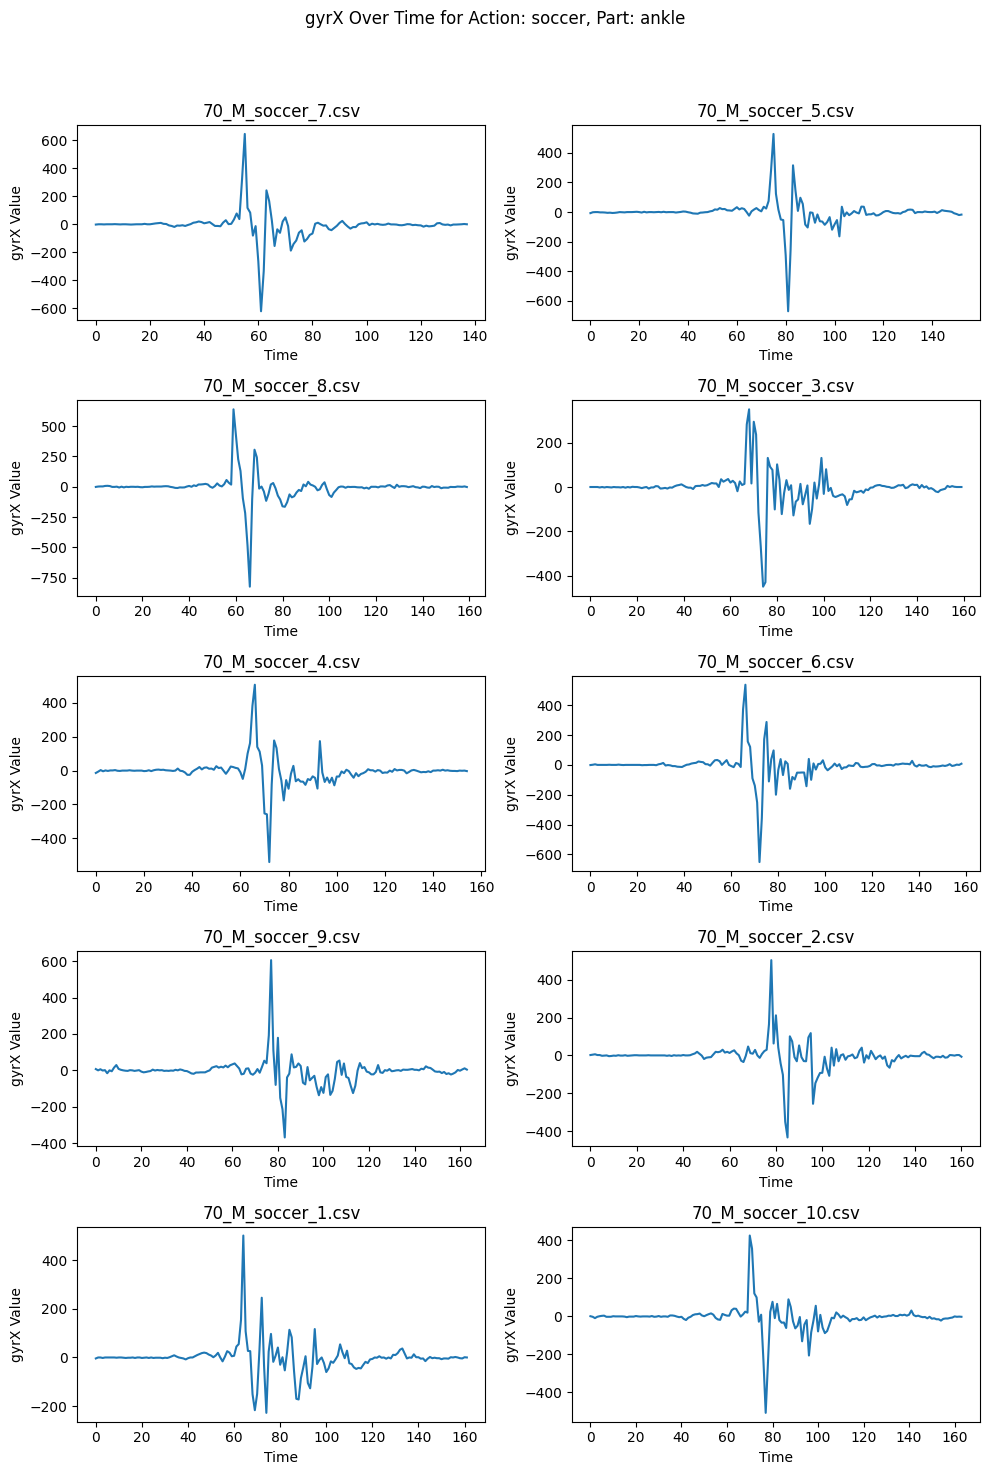

Action soccer Part ankle Column gyrY


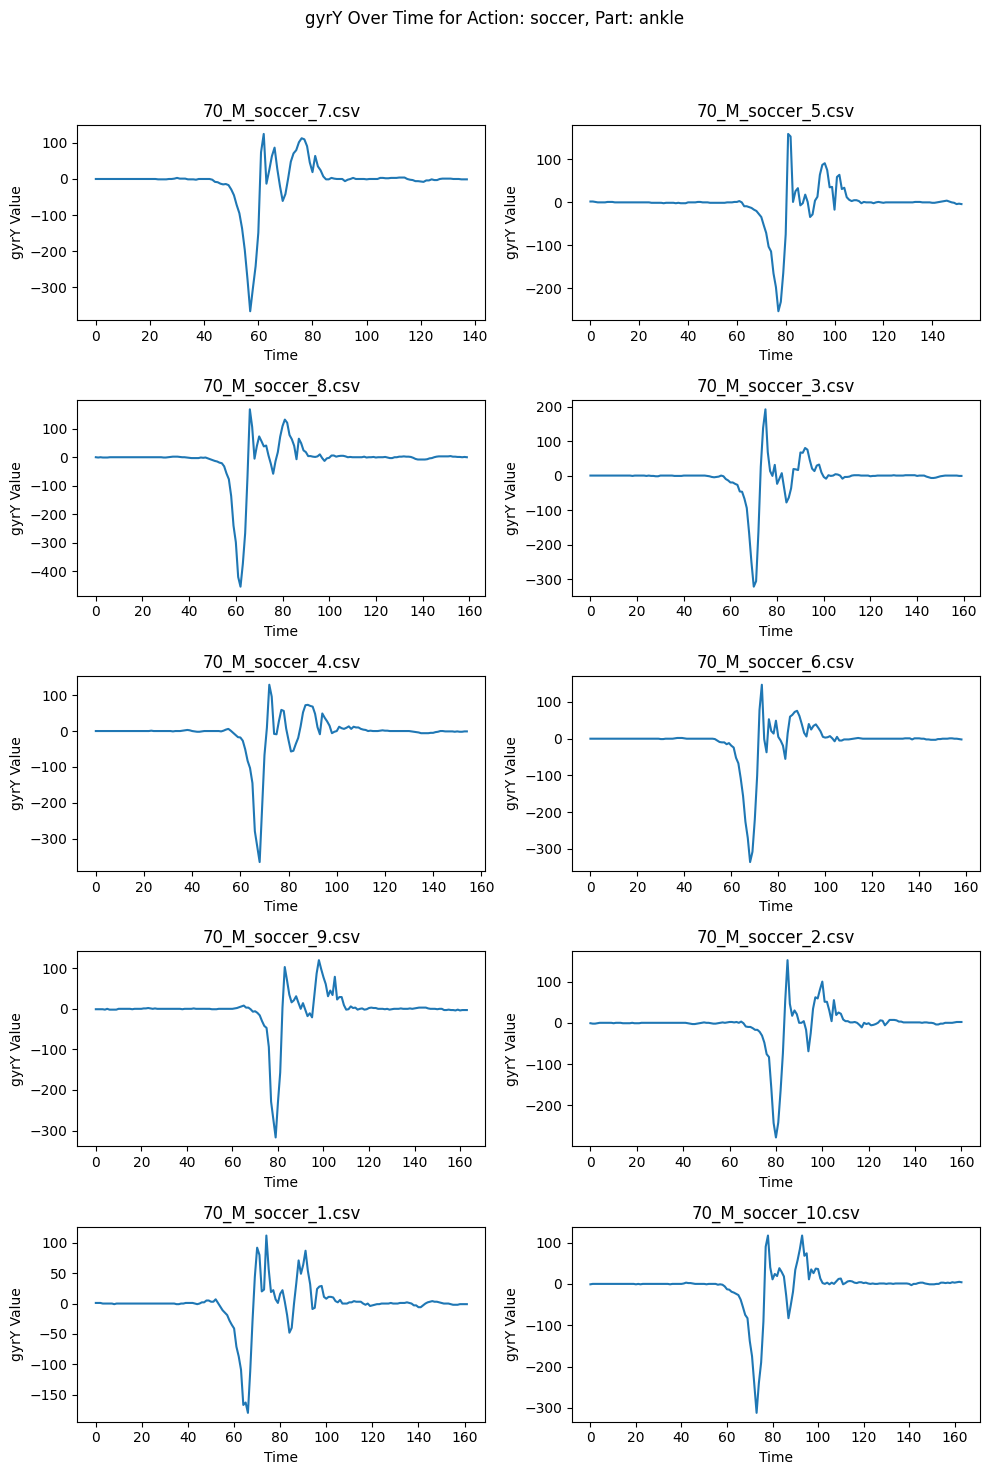

Action soccer Part ankle Column gyrZ


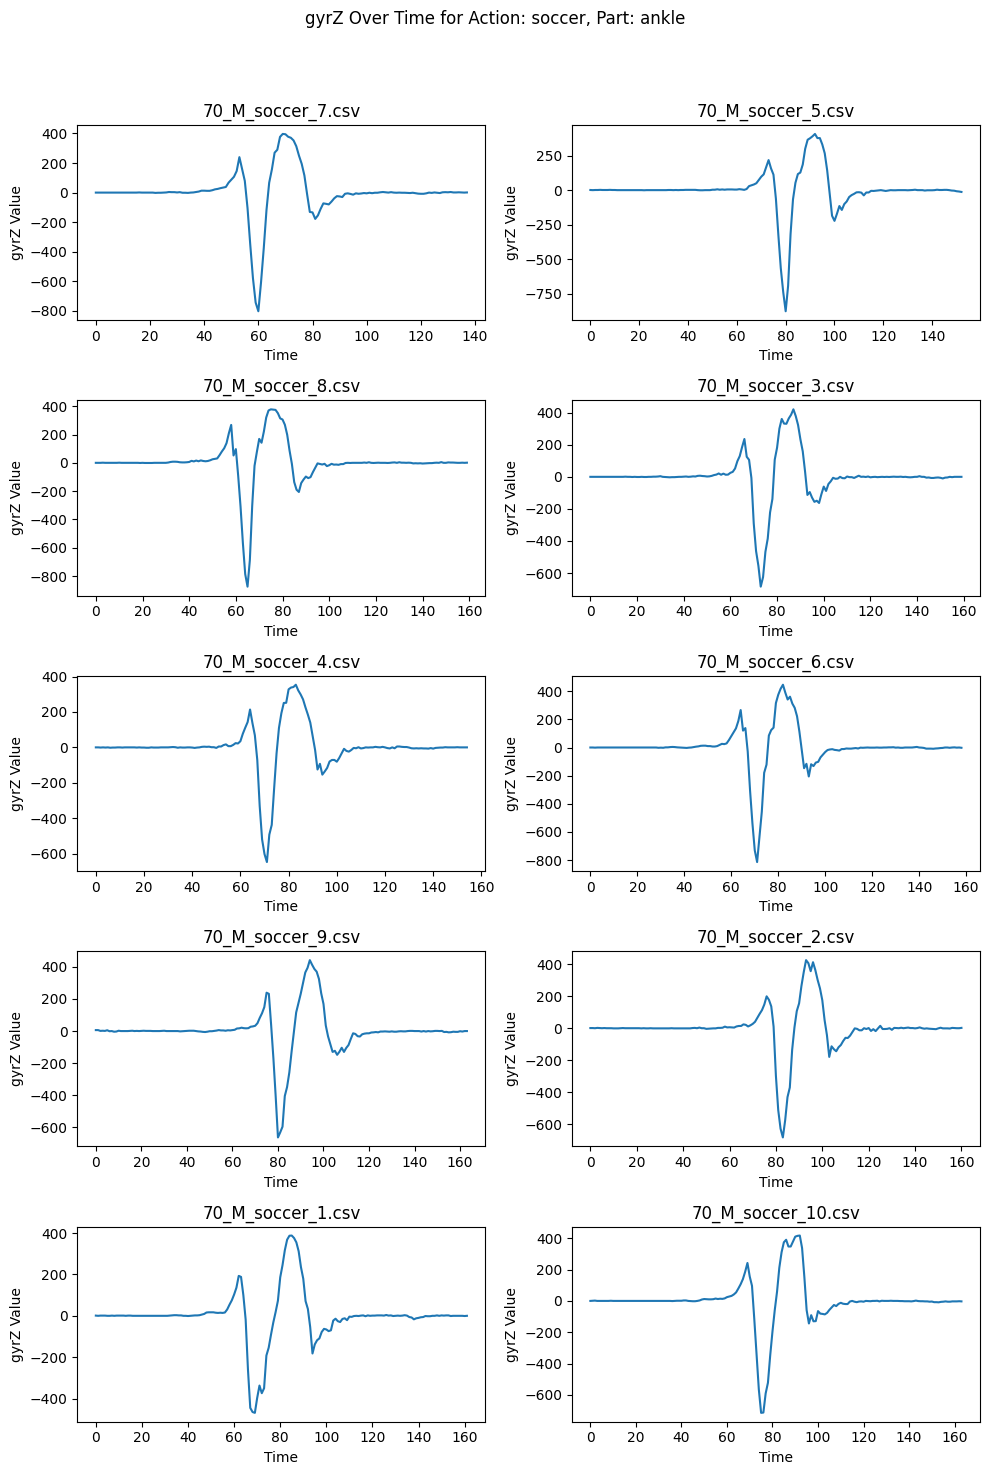

Action soccer Part gun Column accX


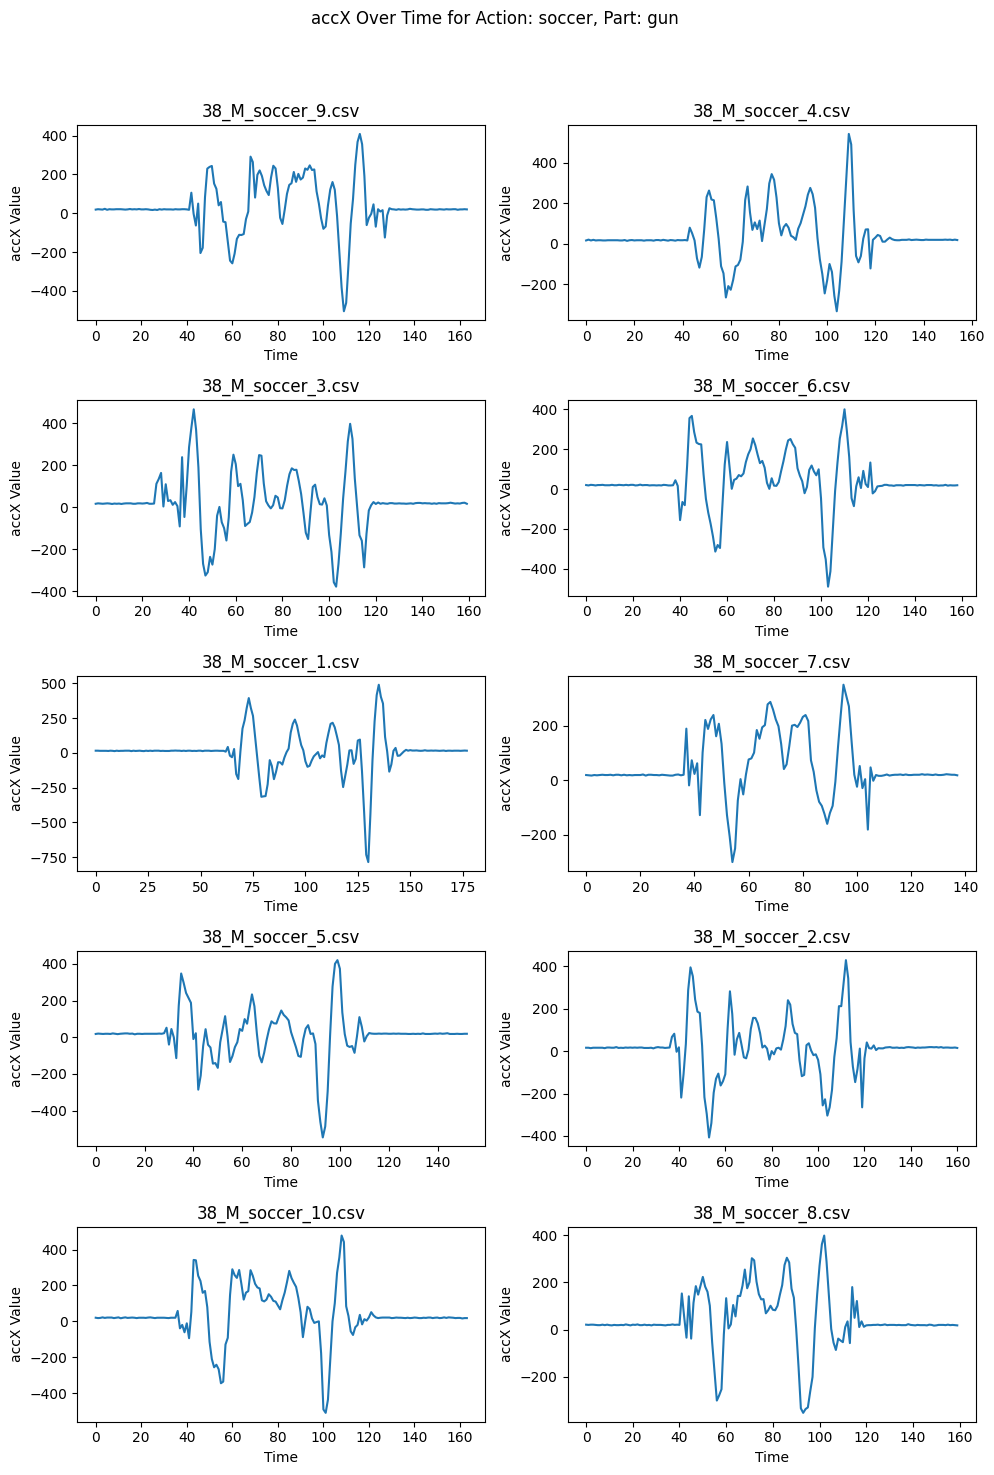

Action soccer Part gun Column accY


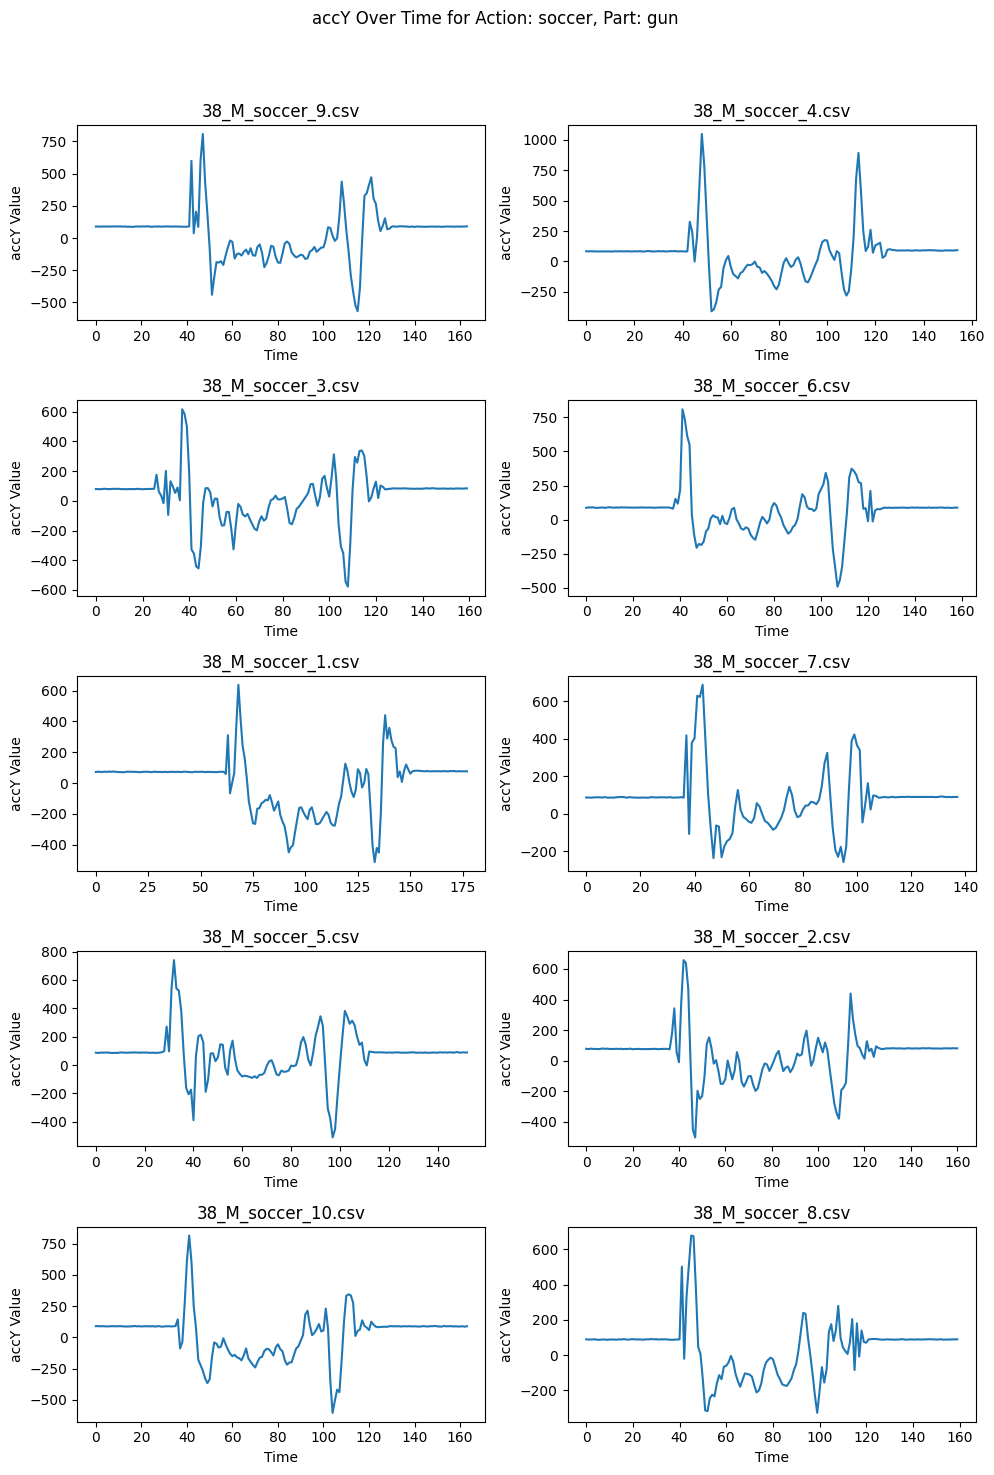

Action soccer Part gun Column accZ


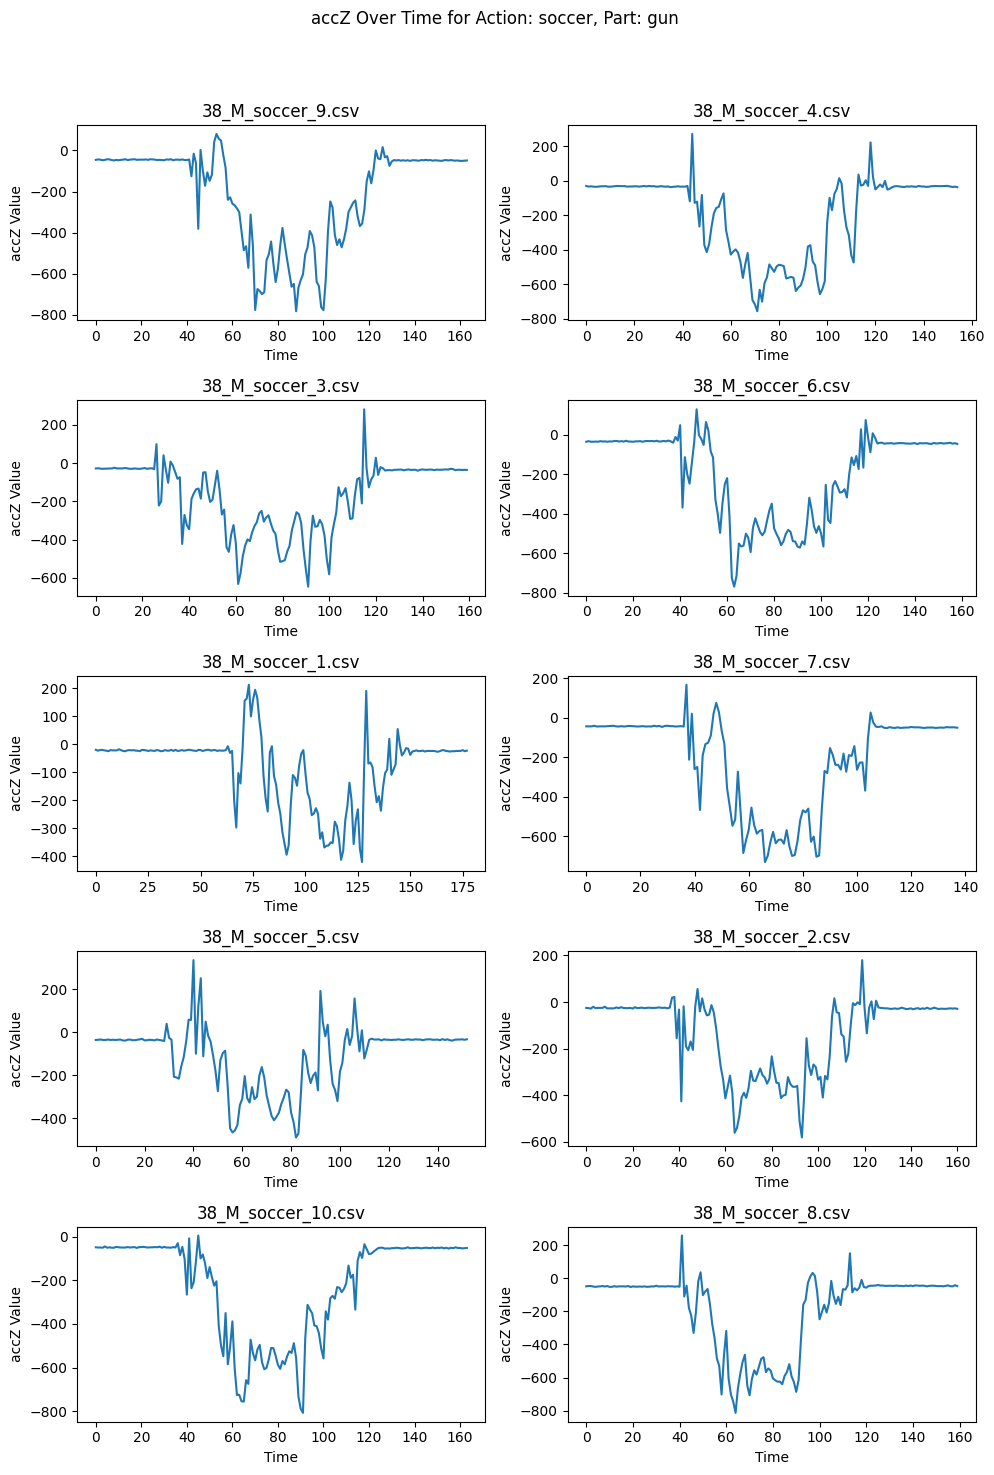

Action soccer Part gun Column gyrX


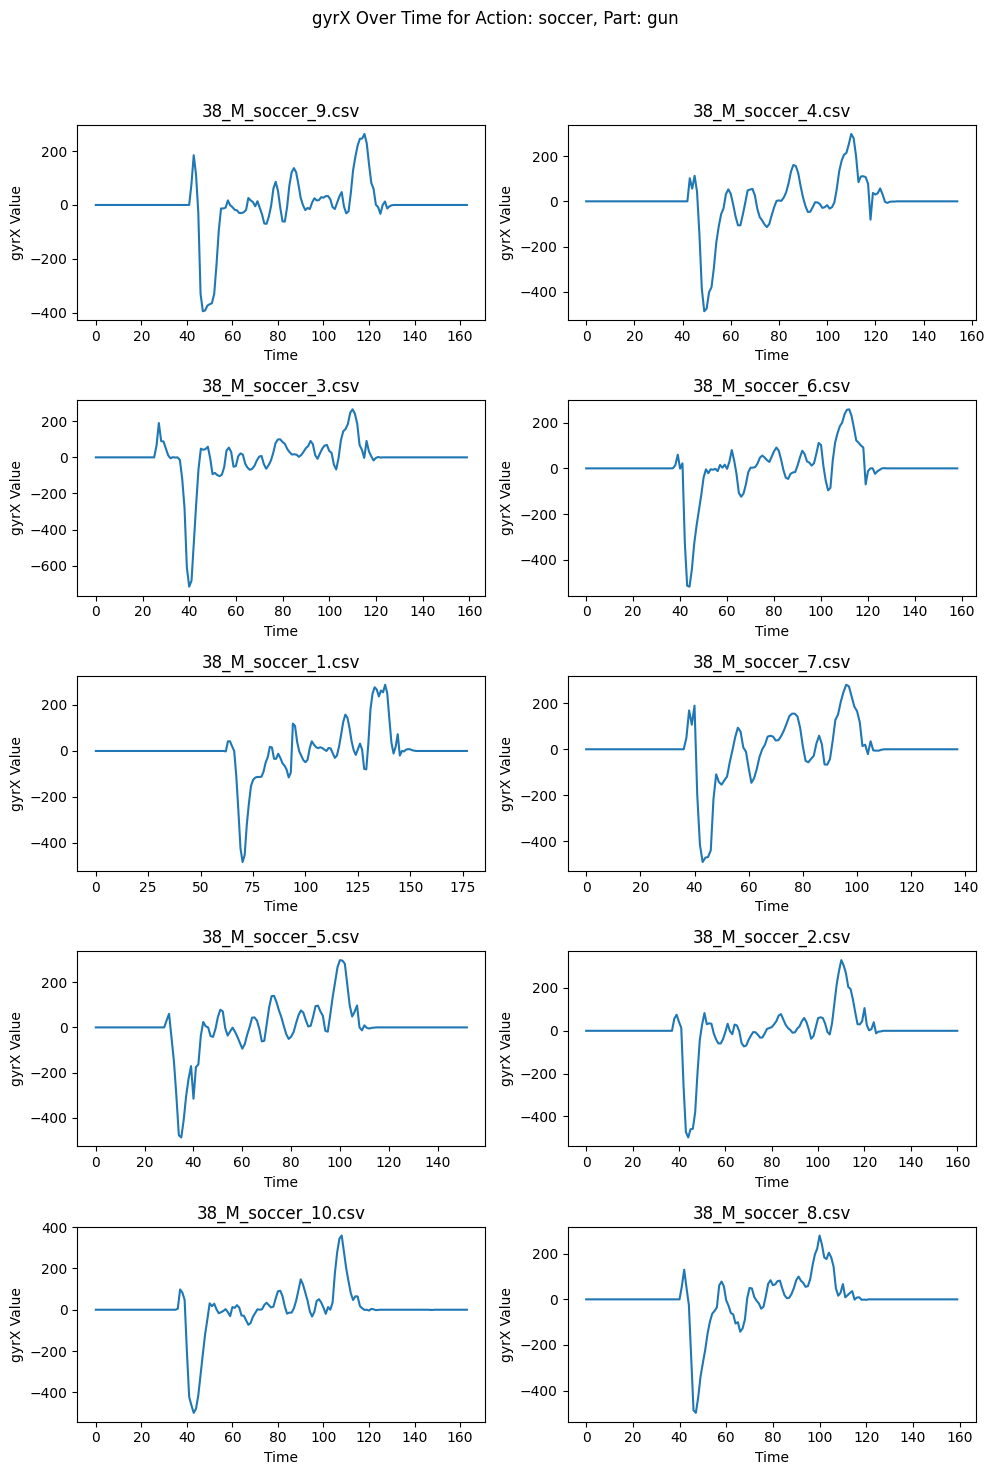

Action soccer Part gun Column gyrY


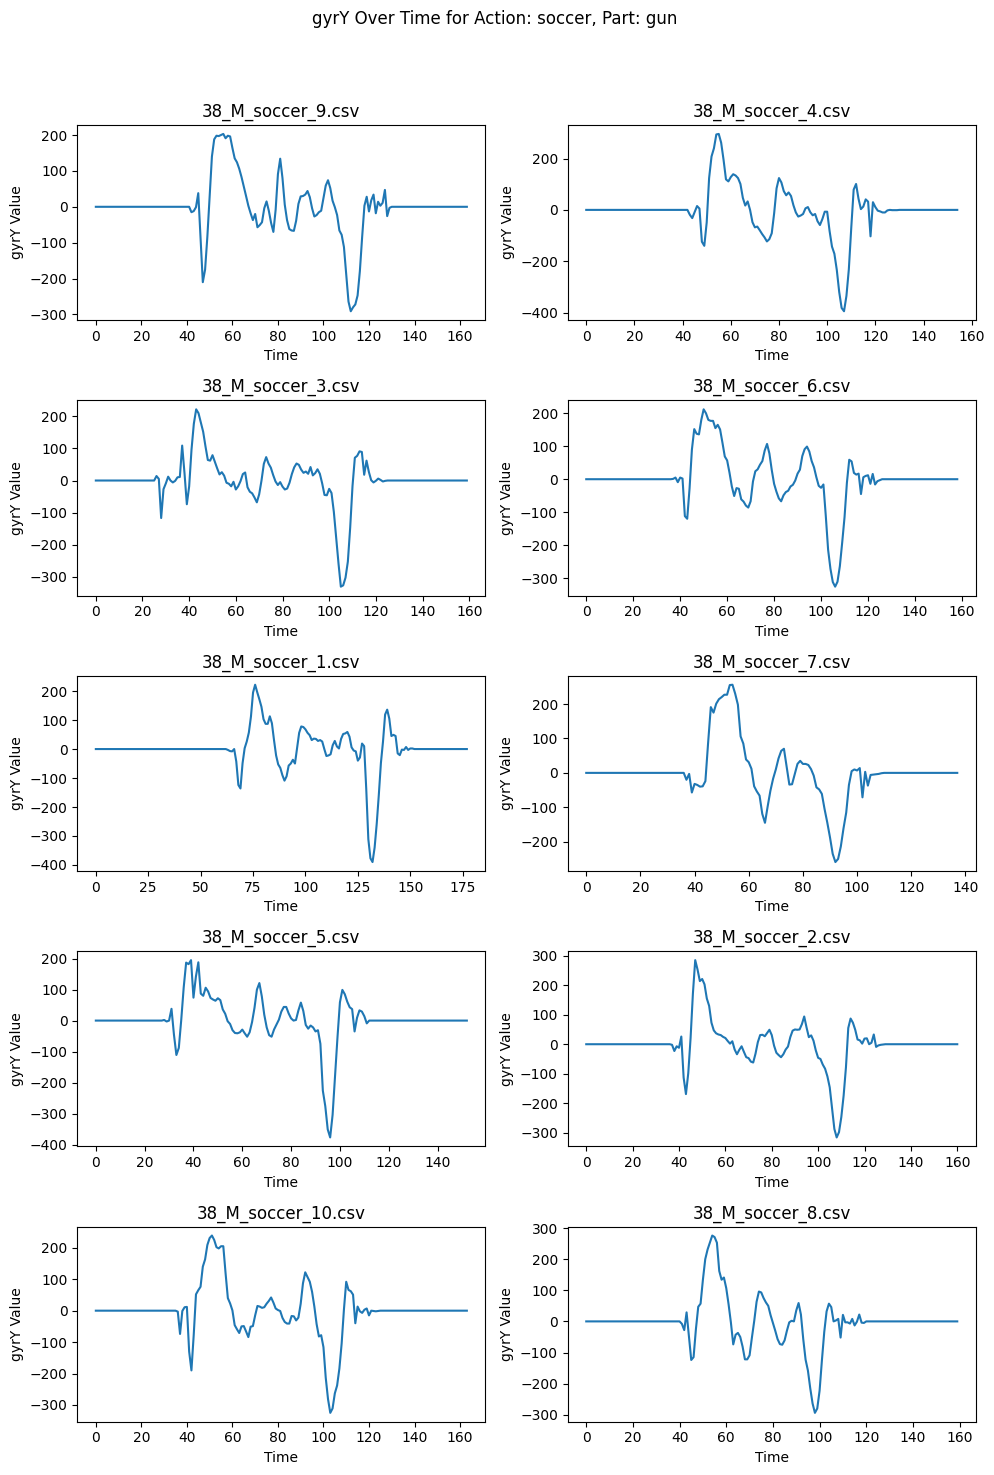

Action soccer Part gun Column gyrZ


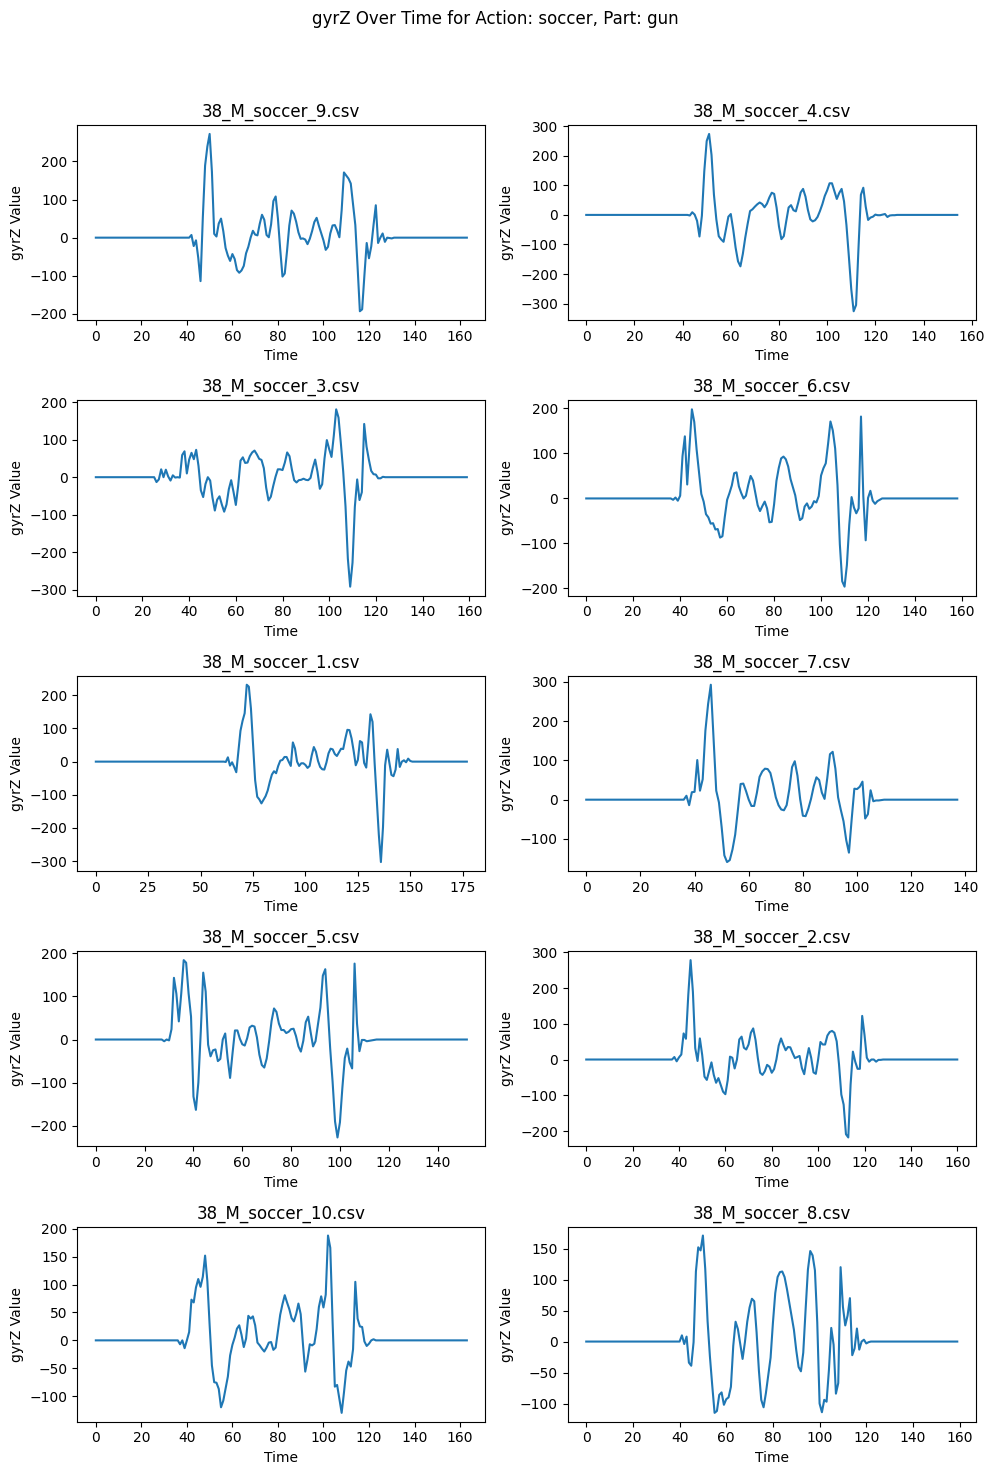

In [10]:
for action in ACTIONS:
    for part in PARTS: 
        folder_path = os.path.join(DATA_PATH, action, part)
        files = os.listdir(folder_path)
        for col in IMU_COLS:
            print("============================================================")
            print(f"Action {action} Part {part} Column {col}")
            plot_same_column_in_grid(action, part, folder_path, col)
            plt.show()